In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Base path
base_dir = "/content/drive/MyDrive/ACDC dataset/Classification"

# Subfolders to create
subfolders = [
    "preprocess",

    "modeling"

]

# Create all folders
for subfolder in subfolders:
    os.makedirs(os.path.join(base_dir, subfolder), exist_ok=True)

print(" Classification project structure created successfully.")

 Classification project structure created successfully.


In [ ]:
import os
import shutil

# Path to predicted masks generated from segmentation model
predicted_base = "/content/drive/MyDrive/ACDC dataset/Segmentation/Training_Model/UNetPlusPlus_Light/Predicted_Labels"
preprocess_dir = "/content/drive/MyDrive/ACDC dataset/Classification/preprocess"

# Target directories for storing copied predicted masks
feature_test_dir = os.path.join(preprocess_dir, "Feature_Extraction_Test")

# Create directories
os.makedirs(feature_test_dir, exist_ok=True)

# Define source folders
test_src = os.path.join(predicted_base, "Testing")

# Copy function
def copy_files(src, dst):
    if os.path.exists(src):
        for f in os.listdir(src):
            if f.endswith(".nii.gz"):
                shutil.copy(os.path.join(src, f), os.path.join(dst, f))
    else:
        print(f" Folder not found → {src}")


# Copy Testing → Feature_Extraction_Test
copy_files(test_src, feature_test_dir)

print(" Segmentation masks copied successfully into separate folders.")
print(f" Test        → {feature_test_dir}")

 Segmentation masks copied successfully into separate folders.
 Test        → /content/drive/MyDrive/ACDC dataset/Classification/preprocess/Feature_Extraction_Test


In [ ]:
import os
import pandas as pd

# Path to the training patients' folders
base_path = "/content/drive/MyDrive/ACDC dataset/database/training"

# List to collect extracted patient data
data = []

# Loop through each patient folder
for patient_folder in sorted(os.listdir(base_path)):
    if not patient_folder.startswith("patient"):
        continue  # Skip folders like 'Images' or unrelated items

    patient_path = os.path.join(base_path, patient_folder)
    info_path = os.path.join(patient_path, "Info.cfg")

    if os.path.isfile(info_path):
        with open(info_path, "r") as f:
            lines = f.readlines()
            patient_data = {"patient_id": patient_folder}
            for line in lines:
                if "ED:" in line:
                    patient_data["ed_frame"] = int(line.strip().split(":")[1])
                elif "ES:" in line:
                    patient_data["es_frame"] = int(line.strip().split(":")[1])
                elif "Group:" in line:
                    patient_data["class"] = line.strip().split(":")[1].strip()
                elif "Height:" in line:
                    patient_data["height"] = float(line.strip().split(":")[1])
                elif "Weight:" in line:
                    patient_data["weight"] = float(line.strip().split(":")[1])
                elif "NbFrame:" in line:
                    patient_data["nbframe"] = int(line.strip().split(":")[1])

            #  Calculate BMI
            if "height" in patient_data and "weight" in patient_data:
                height_m = patient_data["height"] / 100  # convert cm to meters
                weight = patient_data["weight"]
                bmi = round(weight / (height_m ** 2), 2)
                patient_data["bmi"] = bmi

            data.append(patient_data)

# Convert to DataFrame
df = pd.DataFrame(data)

# Save inside your Drive (preprocess folder)
output_path = "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/demographics_with_class_traning.csv"
df.to_csv(output_path, index=False)

print(" File saved to:", output_path)
df.head()


 File saved to: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/demographics_with_class_traning.csv


,patient_id,ed_frame,es_frame,class,height,nbframe,weight,bmi
0,patient001,1,12,DCM,184.0,30,95.0,28.06
1,patient002,1,12,DCM,160.0,30,70.0,27.34
2,patient003,1,15,DCM,165.0,30,77.0,28.28
3,patient004,1,15,DCM,159.0,28,46.0,18.20
4,patient005,1,13,DCM,165.0,30,77.0,28.28


In [ ]:
import os
import pandas as pd

# Path to the training patients' folders
base_path = "/content/drive/MyDrive/ACDC dataset/database/testing"

# List to collect extracted patient data
data = []

# Loop through each patient folder
for patient_folder in sorted(os.listdir(base_path)):
    if not patient_folder.startswith("patient"):
        continue  # Skip folders like 'Images' or unrelated items

    patient_path = os.path.join(base_path, patient_folder)
    info_path = os.path.join(patient_path, "Info.cfg")

    if os.path.isfile(info_path):
        with open(info_path, "r") as f:
            lines = f.readlines()
            patient_data = {"patient_id": patient_folder}
            for line in lines:
                if "ED:" in line:
                    patient_data["ed_frame"] = int(line.strip().split(":")[1])
                elif "ES:" in line:
                    patient_data["es_frame"] = int(line.strip().split(":")[1])
                elif "Group:" in line:
                    patient_data["class"] = line.strip().split(":")[1].strip()
                elif "Height:" in line:
                    patient_data["height"] = float(line.strip().split(":")[1])
                elif "Weight:" in line:
                    patient_data["weight"] = float(line.strip().split(":")[1])
                elif "NbFrame:" in line:
                    patient_data["nbframe"] = int(line.strip().split(":")[1])

            #  Calculate BMI
            if "height" in patient_data and "weight" in patient_data:
                height_m = patient_data["height"] / 100  # convert cm to meters
                weight = patient_data["weight"]
                bmi = round(weight / (height_m ** 2), 2)
                patient_data["bmi"] = bmi

            data.append(patient_data)

# Convert to DataFrame
df = pd.DataFrame(data)

# Save inside your Drive (preprocess folder)
output_path = "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/demographics_with_class_testing.csv"
df.to_csv(output_path, index=False)

print(" File saved to:", output_path)
df.head()


 File saved to: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/demographics_with_class_testing.csv


,patient_id,ed_frame,es_frame,class,height,nbframe,weight,bmi
0,patient101,1,14,DCM,169.0,30,79.0,27.66
1,patient102,1,13,NOR,156.0,30,75.0,30.82
2,patient103,1,11,MINF,175.0,30,107.0,34.94
3,patient104,1,11,HCM,180.0,30,74.0,22.84
4,patient105,1,10,HCM,173.0,30,84.0,28.07


In [ ]:
import os
import pandas as pd

# Load feature filenames for training
train_dir = "/content/drive/MyDrive/ACDC dataset/Segmentation/Training_Model/Train/Labels"
filenames = [f for f in os.listdir(train_dir) if f.endswith(".nii.gz")]

# Load demographics
df_demo = pd.read_csv("/content/drive/MyDrive/ACDC dataset/Classification/preprocess/demographics_with_class_traning.csv")

# Prepare linked records
records = []

for fname in filenames:
    patient_id = fname.split("_")[0]
    match = df_demo[df_demo["patient_id"] == patient_id]
    if not match.empty:
        # Include full demographics info
        row = match.iloc[0].to_dict()
        row.update({"filename": fname})
        records.append(row)

# Save full training file
df_train_full = pd.DataFrame(records)
df_train_full.to_csv("/content/linked_train_full.csv", index=False)

# Copy to Drive
!cp /content/linked_train_full.csv "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv"

print(" Full training file saved with", len(df_train_full), "records.")


 Full training file saved with 1760 records.


In [ ]:
import os
import pandas as pd

# Load feature filenames for training
train_dir = "/content/drive/MyDrive/ACDC dataset/Segmentation/Training_Model/Validation/Labels"
filenames = [f for f in os.listdir(train_dir) if f.endswith(".nii.gz")]

# Load demographics
df_demo = pd.read_csv("/content/drive/MyDrive/ACDC dataset/Classification/preprocess/demographics_with_class_traning.csv")

# Prepare linked records
records = []

for fname in filenames:
    patient_id = fname.split("_")[0]
    match = df_demo[df_demo["patient_id"] == patient_id]
    if not match.empty:
        # Include full demographics info
        row = match.iloc[0].to_dict()
        row.update({"filename": fname})
        records.append(row)

# Save full training file
df_train_full = pd.DataFrame(records)
df_train_full.to_csv("/content/linked_train_full.csv", index=False)

# Copy to Drive
!cp /content/linked_train_full.csv "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv"

print(" Full training file saved with", len(df_train_full), "records.")


 Full training file saved with 440 records.


In [ ]:
import os
import pandas as pd

# Load feature filenames for test
test_dir = "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/Feature_Extraction_Test"
test_filenames = [f for f in os.listdir(test_dir) if f.endswith(".nii.gz")]

# Load demographics
df_demo = pd.read_csv("/content/drive/MyDrive/ACDC dataset/Classification/preprocess/demographics_with_class_testing.csv")

# Prepare linked records
test_records = []

for fname in test_filenames:
    patient_id = fname.split("_")[0]
    match = df_demo[df_demo["patient_id"] == patient_id]
    if not match.empty:
        row = match.iloc[0].to_dict()
        row.update({"filename": fname})
        test_records.append(row)

# Save full test file
df_test_full = pd.DataFrame(test_records)
df_test_full.to_csv("/content/linked_test_full.csv", index=False)

# Copy to Drive
!cp /content/linked_test_full.csv "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv"

print(" Full test file saved with", len(df_test_full), "records.")


 Full test file saved with 100 records.


In [ ]:
import os
import nibabel as nib
import pandas as pd

# === Define input folders for each data split ===
splits = {
    "train": {
        "mask_dir":  "/content/drive/MyDrive/ACDC dataset/Segmentation/Training_Model/Train/Labels",
        "csv_path": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv",
    },
    "val": {
        "mask_dir": "/content/drive/MyDrive/ACDC dataset/Segmentation/Training_Model/Validation/Labels",
        "csv_path": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv",
    },
    "test": {
        "mask_dir": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/Feature_Extraction_Test",
        "csv_path": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv",
    },
}

# === Define label values in segmentation masks ===
LABELS = {
    "rv_voxel_volume": 1,   # Right ventricle
    "myo_voxel_volume": 2,  # Myocardium
    "lv_voxel_volume": 3,   # Left ventricle
}

# === Set voxel volume in cm³ (based on spacing: 1mm³ = 0.001 cm³) ===
VOXEL_VOLUME_CM3 = 0.001

# === Process each dataset split ===
for split_name, paths in splits.items():
    print(f"\n Processing {split_name} set...")

    mask_dir = paths["mask_dir"]
    csv_path = paths["csv_path"]

    if not os.path.exists(csv_path):
        print(f" CSV file not found: {csv_path}")
        continue

    # Load patient-level CSV file (with filenames)
    df = pd.read_csv(csv_path)

    # Check which volume columns are still missing
    volumes_to_calculate = {
        key: val for key, val in LABELS.items() if key not in df.columns
    }

    if not volumes_to_calculate:
        print(" All voxel volume columns already exist. Skipping.")
    else:
        # Initialize lists to hold voxel counts
        volume_data = {k: [] for k in volumes_to_calculate}

        # Loop over each segmentation file and count voxels by label
        for fname in df["filename"]:
            file_path = os.path.join(mask_dir, fname)
            if os.path.exists(file_path):
                img = nib.load(file_path).get_fdata()
                for col_name, label_val in volumes_to_calculate.items():
                    volume_data[col_name].append((img == label_val).sum())
            else:
                for col_name in volumes_to_calculate:
                    volume_data[col_name].append(0)

        # Add voxel counts to the dataframe
        for col_name, values in volume_data.items():
            df[col_name] = values

    # === Convert voxel counts to real volumes (cm³) ===
    if "lv_voxel_volume" in df.columns:
        df["lv_volume_cm3"] = df["lv_voxel_volume"] * VOXEL_VOLUME_CM3
    if "rv_voxel_volume" in df.columns:
        df["rv_volume_cm3"] = df["rv_voxel_volume"] * VOXEL_VOLUME_CM3
    if "myo_voxel_volume" in df.columns:
        df["myo_volume_cm3"] = df["myo_voxel_volume"] * VOXEL_VOLUME_CM3

    # Save updated file back to disk
    df.to_csv(csv_path, index=False)
    print(f" Updated and saved: {csv_path}")



 Processing train set...
 Updated and saved: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv

 Processing val set...
 Updated and saved: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv

 Processing test set...
 Updated and saved: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv


In [ ]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
from scipy.ndimage import center_of_mass

# === Function to compute Eccentricity Index (EI) from a 2D slice ===
def compute_eccentricity_index(mask):
    lv_label = 3
    max_area = 0
    best_slice = None

    # Loop through all slices (depth dimension)
    for i in range(mask.shape[0]):  # 0 = depth (Z)
        slice_2d = mask[i]
        lv_mask = (slice_2d == lv_label).astype(np.uint8)
        area = lv_mask.sum()

        if area > max_area:
            max_area = area
            best_slice = lv_mask

    if best_slice is None or max_area == 0:
        return 0

    y_indices, x_indices = np.where(best_slice == 1)
    if len(x_indices) == 0 or len(y_indices) == 0:
        return 0

    d1 = np.max(x_indices) - np.min(x_indices)  # Horizontal diameter
    d2 = np.max(y_indices) - np.min(y_indices)  # Vertical diameter

    if d1 == 0:
        return 0

    ei = d2 / d1
    return round(ei, 3)


# === Dataset splits and corresponding paths ===
splits = {
    "train": {
        "mask_dir":  "/content/drive/MyDrive/ACDC dataset/Segmentation/Training_Model/Train/Labels",
        "csv_path": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv",
    },
    "val": {
        "mask_dir": "/content/drive/MyDrive/ACDC dataset/Segmentation/Training_Model/Validation/Labels",
        "csv_path": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv",
    },
    "test": {
        "mask_dir": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/Feature_Extraction_Test",
        "csv_path": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv",
    },
}



# === Process each dataset ===
for split, paths in splits.items():
    print(f"\nProcessing {split} set...")

    # use the correct key name
    csv_path = paths["csv_path"]
    df = pd.read_csv(csv_path)
    mask_dir = paths["mask_dir"]

    # Skip if columns already exist
    if "eccentricity_ed" in df.columns and "eccentricity_es" in df.columns:
        print(f"  Eccentricity columns already exist for {split}, skipping.")
        continue

    eccentricity_ed = []
    eccentricity_es = []

    for _, row in df.iterrows():
        patient_id = row["patient_id"]
        ed_frame = row["ed_frame"]
        es_frame = row["es_frame"]

        ed_file = f"{patient_id}_frame{int(ed_frame):02d}_gt.nii.gz"
        es_file = f"{patient_id}_frame{int(es_frame):02d}_gt.nii.gz"

        ed_path = os.path.join(mask_dir, ed_file)
        es_path = os.path.join(mask_dir, es_file)

        if os.path.exists(ed_path):
            ed_mask = nib.load(ed_path).get_fdata()
            eccentricity_ed.append(compute_eccentricity_index(ed_mask))
        else:
            eccentricity_ed.append(0)

        if os.path.exists(es_path):
            es_mask = nib.load(es_path).get_fdata()
            eccentricity_es.append(compute_eccentricity_index(es_mask))
        else:
            eccentricity_es.append(0)

    # Add columns to DataFrame
    df["eccentricity_ed"] = eccentricity_ed
    df["eccentricity_es"] = eccentricity_es

    # Overwrite the original CSV
    df.to_csv(csv_path, index=False)
    print(f"  Eccentricity saved to existing file: {csv_path}")



Processing train set...
  Eccentricity saved to existing file: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv

Processing val set...
  Eccentricity saved to existing file: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv

Processing test set...
  Eccentricity saved to existing file: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv


In [ ]:
import pandas as pd

# Dataset splits and paths
splits = {
    "train": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv",
    "val": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv",
    "test": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv"
}

for name, path in splits.items():
    print(f"\n Processing {name}...")

    df = pd.read_csv(path)

    # Check if both columns exist
    if "eccentricity_ed" in df.columns and "eccentricity_es" in df.columns:
        # Calculate difference
        df["eccentricity_diff"] = df["eccentricity_ed"] - df["eccentricity_es"]
        df.to_csv(path, index=False)
        print(f" Added 'eccentricity_diff' to: {path}")
    else:
        print(f" Missing eccentricity columns in {path}, skipped.")


 Processing train...
 Added 'eccentricity_diff' to: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv

 Processing val...
 Added 'eccentricity_diff' to: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv

 Processing test...
 Added 'eccentricity_diff' to: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv


In [ ]:
import pandas as pd

# === Constants ===
VOXEL_VOLUME_CM3 = 0.001  # 1 mm³ = 0.001 cm³

# === Dataset splits and paths ===
splits = {
    "train": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv",
    "val": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv",
    "test": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv",
}

for split_name, path in splits.items():
    print(f"\n Processing {split_name}...")

    df = pd.read_csv(path)

    # Extract frame number from filename (e.g., frame01 → 1)
    df["frame_number"] = df["filename"].str.extract(r"frame(\d{2})").astype(int)

    # Dictionaries to store ED/ES reference volumes per patient
    ed_volumes = {}
    es_volumes = {}

    # Loop to collect ED/ES voxel volumes for each patient
    for _, row in df.iterrows():
        pid = row["patient_id"]
        frame = row["frame_number"]
        if frame == int(row["ed_frame"]):
            ed_volumes[pid] = {
                "lv_voxel_volume_ed": row.get("lv_voxel_volume", 0),
                "rv_voxel_volume_ed": row.get("rv_voxel_volume", 0),
                "myo_voxel_volume_ed": row.get("myo_voxel_volume", 0),
            }
        elif frame == int(row["es_frame"]):
            es_volumes[pid] = {
                "lv_voxel_volume_es": row.get("lv_voxel_volume", 0),
                "rv_voxel_volume_es": row.get("rv_voxel_volume", 0),
                "myo_voxel_volume_es": row.get("myo_voxel_volume", 0),
            }

    # Add ED volumes to all rows based on patient_id
    df["lv_voxel_volume_ed"] = df["patient_id"].map(lambda x: ed_volumes.get(x, {}).get("lv_voxel_volume_ed", 0))
    df["rv_voxel_volume_ed"] = df["patient_id"].map(lambda x: ed_volumes.get(x, {}).get("rv_voxel_volume_ed", 0))
    df["myo_voxel_volume_ed"] = df["patient_id"].map(lambda x: ed_volumes.get(x, {}).get("myo_voxel_volume_ed", 0))

    # Add ES volumes to all rows based on patient_id
    df["lv_voxel_volume_es"] = df["patient_id"].map(lambda x: es_volumes.get(x, {}).get("lv_voxel_volume_es", 0))
    df["rv_voxel_volume_es"] = df["patient_id"].map(lambda x: es_volumes.get(x, {}).get("rv_voxel_volume_es", 0))
    df["myo_voxel_volume_es"] = df["patient_id"].map(lambda x: es_volumes.get(x, {}).get("myo_voxel_volume_es", 0))

    # Convert voxel counts to volumes in cm³ (≈ mL)
    df["lv_volume_ed_cm3"] = df["lv_voxel_volume_ed"] * VOXEL_VOLUME_CM3
    df["lv_volume_es_cm3"] = df["lv_voxel_volume_es"] * VOXEL_VOLUME_CM3
    df["rv_volume_ed_cm3"] = df["rv_voxel_volume_ed"] * VOXEL_VOLUME_CM3
    df["rv_volume_es_cm3"] = df["rv_voxel_volume_es"] * VOXEL_VOLUME_CM3

    # Calculate stroke volume and ejection fraction
    df["lv_stroke_volume_ml"] = df["lv_volume_ed_cm3"] - df["lv_volume_es_cm3"]
    df["lv_ejection_fraction"] = 100 * df["lv_stroke_volume_ml"] / (df["lv_volume_ed_cm3"] + 1e-5)

    df["rv_stroke_volume_ml"] = df["rv_volume_ed_cm3"] - df["rv_volume_es_cm3"]
    df["rv_ejection_fraction"] = 100 * df["rv_stroke_volume_ml"] / (df["rv_volume_ed_cm3"] + 1e-5)

    # ===  NEW: Advanced Features ===
    df["lv_contraction_ratio"] = (df["lv_volume_ed_cm3"] - df["lv_volume_es_cm3"]) / (df["lv_volume_ed_cm3"] + 1e-5)
    df["rv_contraction_ratio"] = (df["rv_volume_ed_cm3"] - df["rv_volume_es_cm3"]) / (df["rv_volume_ed_cm3"] + 1e-5)

    df["contraction_diff"] = df["lv_contraction_ratio"] - df["rv_contraction_ratio"]
    df["edv_ratio_diff"] = df["rv_volume_ed_cm3"] / (df["lv_volume_ed_cm3"] + 1e-5)
    df["stroke_symmetry"] = abs(df["lv_stroke_volume_ml"] - df["rv_stroke_volume_ml"]) / (df["lv_stroke_volume_ml"] + df["rv_stroke_volume_ml"] + 1e-5)

    # Drop temporary frame number column
    df.drop(columns=["frame_number"], inplace=True)

    # Save the updated file
    df.to_csv(path, index=False)
    print(f" Saved updated file: {path}")



 Processing train...
 Saved updated file: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv

 Processing val...
 Saved updated file: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv

 Processing test...
 Saved updated file: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv


In [ ]:
import pandas as pd


splits = {
    "train": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv",
    "val": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv",
    "test": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv",
}

# Loop through each dataset
for name, path in splits.items():
    print(f"\n Processing {name}...")

    df = pd.read_csv(path)

    #  Contraction Ratios
    df["lv_contraction_ratio"] = (df["lv_voxel_volume_ed"] - df["lv_voxel_volume_es"]) / (df["lv_voxel_volume_ed"] + 1e-5)
    df["rv_contraction_ratio"] = (df["rv_voxel_volume_ed"] - df["rv_voxel_volume_es"]) / (df["rv_voxel_volume_ed"] + 1e-5)

    #  Volume Ratios at ED
    df["rv_lv_ratio_ed"] = df["rv_voxel_volume_ed"] / (df["lv_voxel_volume_ed"] + 1e-5)
    df["lv_myo_ratio_ed"] = df["lv_voxel_volume_ed"] / (df["myo_voxel_volume_ed"] + 1e-5)

    #  Volume Ratios at ES
    df["rv_lv_ratio_es"] = df["rv_voxel_volume_es"] / (df["lv_voxel_volume_es"] + 1e-5)
    df["lv_myo_ratio_es"] = df["lv_voxel_volume_es"] / (df["myo_voxel_volume_es"] + 1e-5)


    #  Save back to same file
    df.to_csv(path, index=False)
    print(f" Saved updated features to: {path}")





 Processing train...
 Saved updated features to: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv

 Processing val...
 Saved updated features to: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv

 Processing test...
 Saved updated features to: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv


In [ ]:
import pandas as pd

splits = {
    "train": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv",
    "val": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv",
    "test": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv",
}

VOXEL_VOLUME_CM3 = 0.001
MYO_DENSITY = 1.05  # g/cm³

for name, path in splits.items():
    print(f"\n Processing {name}...")

    df = pd.read_csv(path)

    # Skip if already exists
    if "lv_mass_ed" in df.columns and "lv_mass_index_ed" in df.columns:
        print(f" LV mass already exists in {name}, skipping.")
        continue

    # LV myocardial mass (grams)
    df["lv_mass_ed"] = df["myo_voxel_volume_ed"] * VOXEL_VOLUME_CM3 * MYO_DENSITY
    df["lv_mass_es"] = df["myo_voxel_volume_es"] * VOXEL_VOLUME_CM3 * MYO_DENSITY

    # Body Surface Area (BSA) using Du Bois formula
    df["bsa"] = 0.007184 * (df["height"] ** 0.725) * (df["weight"] ** 0.425)

    # LV mass index (g/m²)
    df["lv_mass_index_ed"] = df["lv_mass_ed"] / (df["bsa"] + 1e-5)
    df["lv_mass_index_es"] = df["lv_mass_es"] / (df["bsa"] + 1e-5)

    df.to_csv(path, index=False)
    print(f" LV Mass and LVMI added and saved to: {path}")



 Processing train...
 LV Mass and LVMI added and saved to: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv

 Processing val...
 LV Mass and LVMI added and saved to: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv

 Processing test...
 LV Mass and LVMI added and saved to: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv


In [ ]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
from scipy.ndimage import distance_transform_edt

# === Smarter wall thickness function (uses slice with max LV area) ===
def compute_wall_thickness(mask):
    lv_label = 3
    myo_label = 2

    max_area = 0
    best_lv_mask = None
    best_myo_mask = None

    for i in range(mask.shape[0]):
        slice_2d = mask[i]
        lv_mask = (slice_2d == lv_label).astype(np.uint8)
        myo_mask = (slice_2d == myo_label).astype(np.uint8)

        area = lv_mask.sum()
        if area > max_area:
            max_area = area
            best_lv_mask = lv_mask
            best_myo_mask = myo_mask

    if best_lv_mask is None or best_myo_mask is None:
        return 0

    # Distance transform: distance from each pixel to nearest MYO (epi)
    dist = distance_transform_edt(~best_myo_mask)
    thickness_vals = dist[best_lv_mask == 1]

    if len(thickness_vals) == 0:
        return 0

    return round(np.mean(thickness_vals), 3)
# === Dataset paths ===
splits = {
    "train": {
        "mask_dir":  "/content/drive/MyDrive/ACDC dataset/Segmentation/Training_Model/Train/Labels",
        "csv_path": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv",
    },
    "val": {
        "mask_dir": "/content/drive/MyDrive/ACDC dataset/Segmentation/Training_Model/Validation/Labels",
        "csv_path": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv",
    },
    "test": {
        "mask_dir": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/Feature_Extraction_Test",
        "csv_path": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv",
    },
}

# === Apply to each split ===
for split, paths in splits.items():
    print(f"\nProcessing {split} set...")

    csv_path = paths["csv_path"]        # <-- use csv_path, not "csv"
    df = pd.read_csv(csv_path)
    mask_dir = paths["mask_dir"]

    if "wall_thickness_ed" in df.columns and "wall_thickness_es" in df.columns:
        print(f"  Wall thickness already exists for {split}, skipping.")
        continue

    thickness_ed = []
    thickness_es = []

    for _, row in df.iterrows():
        patient_id = row["patient_id"]
        ed_frame = row["ed_frame"]
        es_frame = row["es_frame"]

        ed_file = f"{patient_id}_frame{int(ed_frame):02d}_gt.nii.gz"
        es_file = f"{patient_id}_frame{int(es_frame):02d}_gt.nii.gz"

        ed_path = os.path.join(mask_dir, ed_file)
        es_path = os.path.join(mask_dir, es_file)

        if os.path.exists(ed_path):
            ed_mask = nib.load(ed_path).get_fdata()
            thickness_ed.append(compute_wall_thickness(ed_mask))
        else:
            thickness_ed.append(0)

        if os.path.exists(es_path):
            es_mask = nib.load(es_path).get_fdata()
            thickness_es.append(compute_wall_thickness(es_mask))
        else:
            thickness_es.append(0)

    df["wall_thickness_ed"] = thickness_ed
    df["wall_thickness_es"] = thickness_es

    df.to_csv(csv_path, index=False)
    print(f"  Wall thickness added to: {csv_path}")


Processing train set...
  Wall thickness added to: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv

Processing val set...
  Wall thickness added to: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv

Processing test set...
  Wall thickness added to: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv


In [ ]:
import pandas as pd
import os

# Define paths
splits = {
    "train": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv",
    "val": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv",
    "test": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv",
}

for name, path in splits.items():
    print(f"\n Processing {name}...")

    if not os.path.exists(path):
        print(f" File not found: {path}")
        continue

    df = pd.read_csv(path)

    # --- Volume differences between ED and ES ---
    df["lv_volume_diff"] = df["lv_voxel_volume_ed"] - df["lv_voxel_volume_es"]
    df["rv_volume_diff"] = df["rv_voxel_volume_ed"] - df["rv_voxel_volume_es"]
    df["myo_volume_diff"] = df["myo_voxel_volume_ed"] - df["myo_voxel_volume_es"]

    # --- Volume Ratios ---
    df["lv_rv_ratio_ed"] = df["lv_voxel_volume_ed"] / (df["rv_voxel_volume_ed"] + 1e-5)
    df["lv_rv_ratio_es"] = df["lv_voxel_volume_es"] / (df["rv_voxel_volume_es"] + 1e-5)

    df["lv_myo_ratio_ed"] = df["lv_voxel_volume_ed"] / (df["myo_voxel_volume_ed"] + 1e-5)
    df["rv_myo_ratio_ed"] = df["rv_voxel_volume_ed"] / (df["myo_voxel_volume_ed"] + 1e-5)

    # Save updated CSV
    df.to_csv(path, index=False)
    print(f" Saved updated file: {path}")



 Processing train...
 Saved updated file: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv

 Processing val...
 Saved updated file: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv

 Processing test...
 Saved updated file: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv


In [ ]:
import pandas as pd
import numpy as np
import os

splits = {
    "train": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv",
    "val": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv",
    "test": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv",
}

for name, path in splits.items():
    print(f"\nProcessing {name}...")

    if not os.path.exists(path):
        print(f" File not found: {path}")
        continue

    df = pd.read_csv(path)

    if "wall_thickness_ed" not in df.columns or "lv_volume_ed_cm3" not in df.columns:
        print(" Required columns missing. Skipping.")
        continue

    # Convert thickness from mm to cm before computing RWT
    df["rwt"] = 2 * (df["wall_thickness_ed"] / 10) / (np.cbrt(df["lv_volume_ed_cm3"]) + 1e-5)

    df.to_csv(path, index=False)
    print(f" RWT (fixed units) updated and saved in: {path}")

    print("\nRWT Statistics:")
    print(df["rwt"].describe())



Processing train...
 RWT (fixed units) updated and saved in: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv

RWT Statistics:
count    1760.000000
mean        5.031872
std         2.856305
min         0.000000
25%         4.995183
50%         6.240000
75%         6.831614
max         9.644428
Name: rwt, dtype: float64

Processing val...
 RWT (fixed units) updated and saved in: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv

RWT Statistics:
count    440.000000
mean       1.806888
std        2.902593
min        0.000000
25%        0.000000
50%        0.000000
75%        5.334042
max        8.844262
Name: rwt, dtype: float64

Processing test...
 RWT (fixed units) updated and saved in: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv

RWT Statistics:
count    100.000000
mean       6.353194
std        0.781346
min        4.706839
25%        5.762841
50%        6.399490
75%        6.7459

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv")

print("\n RWT:")
print(df["rwt"].describe())

print("\n LV Mass ED:")
print(df["lv_mass_ed"].describe())



 RWT:
count    1760.000000
mean        5.031872
std         2.856305
min         0.000000
25%         4.995183
50%         6.240000
75%         6.831614
max         9.644428
Name: rwt, dtype: float64

 LV Mass ED:
count    1760.000000
mean       18.063799
std         6.082052
min         8.400000
25%        13.614300
50%        17.228400
75%        21.645750
max        41.731200
Name: lv_mass_ed, dtype: float64


In [ ]:
import pandas as pd

# === File paths for the multiclass CSVs ===
train_path = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv'
val_path   = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv'
test_path  = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv'

# === Function to compute new derived features ===
def add_new_features(df):
    df['myo_voxel_volume_diff'] = df['myo_voxel_volume_ed'] - df['myo_voxel_volume_es']
    df['lv_mass_diff'] = df['lv_mass_ed'] - df['lv_mass_es']
    df['stroke_volume_diff'] = df['lv_stroke_volume_ml'] - df['rv_stroke_volume_ml']
    return df

# === Load CSVs ===
df_train = pd.read_csv(train_path)
df_val   = pd.read_csv(val_path)
df_test  = pd.read_csv(test_path)

# === Add features ===
df_train = add_new_features(df_train)
df_val   = add_new_features(df_val)
df_test  = add_new_features(df_test)

# === Save updated CSVs ===
df_train.to_csv(train_path, index=False)
df_val.to_csv(val_path, index=False)
df_test.to_csv(test_path, index=False)

print(" All multiclass CSV files updated with new derived features.")


 All multiclass CSV files updated with new derived features.


In [ ]:
import pandas as pd

# === File paths ===
train_path = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv'
val_path = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv'
test_path = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv'

# === Add new features to the DataFrame ===
def add_new_features(df):
    df['myo_voxel_volume_diff'] = df['myo_voxel_volume_ed'] - df['myo_voxel_volume_es']
    df['lv_mass_diff'] = df['lv_mass_ed'] - df['lv_mass_es']
    df['stroke_volume_diff'] = df['lv_stroke_volume_ml'] - df['rv_stroke_volume_ml']
    return df

# === Load CSV files ===
df_train = pd.read_csv(train_path)
df_val = pd.read_csv(val_path)
df_test = pd.read_csv(test_path)

# === Add new features to all splits ===
df_train = add_new_features(df_train)
df_val = add_new_features(df_val)
df_test = add_new_features(df_test)

# === Save updated CSV files ===
df_train.to_csv(train_path, index=False)
df_val.to_csv(val_path, index=False)
df_test.to_csv(test_path, index=False)

print(" Train, validation, and test CSVs updated with new features.")


 Train, validation, and test CSVs updated with new features.


In [ ]:
import pandas as pd

# Map original class labels to numerical codes for multi-class classification
label_map = {
    'NOR': 0,     # Normal
    'RV': 1,      # Right Ventricular Abnormality
    'DCM': 2,     # Dilated Cardiomyopathy
    'HCM': 3,     # Hypertrophic Cardiomyopathy
    'MINF': 4     # Myocardial Infarction
}

# Define the path where the CSV files are located
base_path = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess'

# Process each dataset split (train, validation, test)
for split in ['train', 'val', 'test']:
    file_path = f'{base_path}/linked_{split}_full.csv'

    # Load the dataset
    df = pd.read_csv(file_path)

    # Add class code (0–4)
    df['class_code'] = df['class'].map(label_map)

    # Add binary class: 1 = Right (RV), 0 = Left (others)
    df['class_binary'] = df['class'].apply(lambda x: 1 if x == 'RV' else 0)

    # Save the updated file
    output_path = f'{base_path}/linked_{split}_full.csv'
    df.to_csv(output_path, index=False)

    print(f" Saved: {output_path}")


 Saved: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv
 Saved: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv
 Saved: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv


In [ ]:
import pandas as pd
import os

# === File paths ===
splits = {
    "train": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv",
    "val": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv",
    "test": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv",
}

def add_clinical_features(df):

    epsilon = 1e-5

    # 1. EDV indexed to BSA
    df["rv_edv_index_bsa"] = df["rv_volume_ed_cm3"] / (df["bsa"] + epsilon)
    df["lv_edv_index_bsa"] = df["lv_volume_ed_cm3"] / (df["bsa"] + epsilon)


    df["lv_mass_index_bsa"] = df["lv_mass_ed"] / (df["bsa"] + epsilon)


    df["rv_lv_edv_ratio"] = df["rv_volume_ed_cm3"] / (df["lv_volume_ed_cm3"] + epsilon)


    df["is_high_rv_volume"] = (df["rv_edv_index_bsa"] > 114).astype(int)


    df["is_low_lv_mass"] = (df["lv_mass_index_bsa"] < 46).astype(int)

    return df

# === Apply to all splits
for name, path in splits.items():
    if not os.path.exists(path):
        print(f"File not found: {path}")
        continue

    print(f"\nProcessing: {name}")
    df = pd.read_csv(path)
    df = add_clinical_features(df)
    df.to_csv(path, index=False)
    print(f" → Saved with clinical features to: {path}")



Processing: train
 → Saved with clinical features to: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv

Processing: val
 → Saved with clinical features to: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv

Processing: test
 → Saved with clinical features to: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv


# ***Outlier Detection and Removal using Isolation Forest for ACDC Classification Data Preprocessing***

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

def flag_outliers(df, feature_cols, contamination=0.05, random_state=42):
    """
    1) Apply log1p and standard scaling on specified numeric feature columns.
    2) Detect outliers and add 'outlier_flag' column (1 = normal, -1 = outlier).
    """
    # Safe log1p transformation
    X = df[feature_cols].copy().astype(float)
    X[X <= 0] = 1e-5
    X = np.log1p(X).replace([np.inf, -np.inf], np.nan).fillna(0)

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Fit IsolationForest to detect outliers
    iso = IsolationForest(contamination=contamination, random_state=random_state)
    df['outlier_flag'] = iso.fit_predict(X_scaled)
    return df

# Define input and output file paths and whether to filter outliers
splits = {
    "train": {
        "input":  "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_full.csv",
        "output": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_cleaned_v111.csv",
        "filter_outliers": True
    },
    "val": {
        "input":  "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_full.csv",
        "output": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_cleaned_v111.csv",
        "filter_outliers": True
    },
    "test": {
        "input":  "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_full.csv",
        "output": "/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_cleaned_v111.csv",
        "filter_outliers": False
    }
}

# Process each split
for name, paths in splits.items():
    # 1. Load the full dataset
    df = pd.read_csv(paths["input"])

    # 2. Identify numeric feature columns (exclude metadata and labels)
    meta_cols  = ['patient_id', 'filename']
    label_cols = ['class', 'class_code', 'class_binary']
    skip_cols  = meta_cols + label_cols
    feature_cols = df.drop(columns=skip_cols, errors='ignore') \
                     .select_dtypes(include=[np.number]).columns.tolist()

    # 3. Flag outliers in the DataFrame
    df_flagged = flag_outliers(df, feature_cols)

    # 4. Remove outliers only for train and validation sets
    if paths["filter_outliers"]:
        df_flagged = df_flagged[df_flagged['outlier_flag'] == 1].reset_index(drop=True)

    # 5. Save the cleaned dataset
    df_flagged.to_csv(paths["output"], index=False)
    print(f"Saved: {paths['output']} (rows: {len(df_flagged)})")


Saved: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_cleaned_v111.csv (rows: 1672)
Saved: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_val_cleaned_v111.csv (rows: 418)
Saved: /content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_cleaned_v111.csv (rows: 100)


# ***Training, Evaluating, and Selecting the Best Multi-class Classifier for binary Class***

In [ ]:
# =========================
# SelectKBest sweep (k = 10,20,30,40) with SVM-RBF
# Cross-validation on TRAIN only
# =========================

import os, warnings, logging
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_validate, StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Ignore warnings
warnings.filterwarnings('ignore')

# === 1. Load training data only ===
PREPROC_DIR = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess'
TRAIN_CSV   = os.path.join(PREPROC_DIR, 'linked_train_cleaned_v111.csv')

df = pd.read_csv(TRAIN_CSV)
df = df[df['class_binary'].notna()].reset_index(drop=True)

X = df.drop(columns=['patient_id','filename','class','class_code','class_binary'], errors='ignore')
y = df['class_binary']

# === 2. Sweep k values ===
k_list = [10, 20, 30, 40]

# Base classifier: calibrated SVM-RBF
clf = CalibratedClassifierCV(
    SVC(kernel='rbf', C=2.0, gamma='scale', class_weight='balanced', probability=True, random_state=42),
    cv=3, method='sigmoid'
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
for k in k_list:
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('select', SelectKBest(score_func=f_classif, k=k)),
        ('clf', clf)
    ])

    scores = cross_validate(pipe, X, y, cv=cv, scoring=['accuracy','f1_macro'])
    acc = scores['test_accuracy'].mean()
    f1  = scores['test_f1_macro'].mean()
    results.append((k, acc, f1))
    print(f"k={k}: Accuracy={acc:.3f}, F1-macro={f1:.3f}")

# === 3. Summary table ===
res_df = pd.DataFrame(results, columns=['k','Accuracy','F1-macro'])
print("\nSummary:\n", res_df)


k=10: Accuracy=0.974, F1-macro=0.961
k=20: Accuracy=0.998, F1-macro=0.997
k=30: Accuracy=1.000, F1-macro=1.000
k=40: Accuracy=1.000, F1-macro=1.000

Summary:
     k  Accuracy  F1-macro
0  10  0.973656  0.960743
1  20  0.998204  0.997215
2  30  1.000000  1.000000
3  40  1.000000  1.000000


In [ ]:
# === 1. Mount Google Drive (if running in Colab) ===
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
except ModuleNotFoundError:
    pass  # skip if not in Colab

# === 2. Imports ===
import pandas as pd
from sklearn.preprocessing    import StandardScaler
from sklearn.svm              import SVC
from sklearn.feature_selection import RFE

# === 3. Load your data ===
TRAIN_CSV = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_cleaned_v111.csv'
df = pd.read_csv(TRAIN_CSV)

# === 4. Prepare X and y ===
y = df['class_binary']
X = df.drop(columns=['patient_id','filename','class','class_code','class_binary'])

# Drop rows with missing values
mask = X.notna().all(axis=1)
X, y = X.loc[mask], y.loc[mask]

# === 5. Standardize features ===
X_std = StandardScaler().fit_transform(X)

# === 6. Use RFE with a linear SVM to pick top 30 features ===
svc = SVC(kernel='linear', class_weight='balanced', random_state=42)
selector = RFE(estimator=svc, n_features_to_select=30, step=1)
selector.fit(X_std, y)

# === 7. Extract the names of the selected features ===
selected_svm_30 = X.columns[selector.support_].tolist()

print("Top 30 features selected by RFE with linear SVM:")
for feat in selected_svm_30:
    print(" -", feat)


Mounted at /content/drive
Top 30 features selected by RFE with linear SVM:
 - height
 - nbframe
 - lv_voxel_volume_ed
 - myo_voxel_volume_ed
 - rv_voxel_volume_es
 - myo_voxel_volume_es
 - lv_volume_ed_cm3
 - rv_volume_es_cm3
 - lv_stroke_volume_ml
 - lv_ejection_fraction
 - rv_ejection_fraction
 - lv_contraction_ratio
 - rv_contraction_ratio
 - contraction_diff
 - edv_ratio_diff
 - lv_myo_ratio_ed
 - lv_myo_ratio_es
 - lv_mass_ed
 - lv_mass_es
 - lv_mass_index_ed
 - lv_mass_index_es
 - wall_thickness_ed
 - lv_volume_diff
 - lv_rv_ratio_ed
 - lv_rv_ratio_es
 - rv_myo_ratio_ed
 - rwt
 - rv_edv_index_bsa
 - lv_edv_index_bsa
 - rv_lv_edv_ratio


In [ ]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


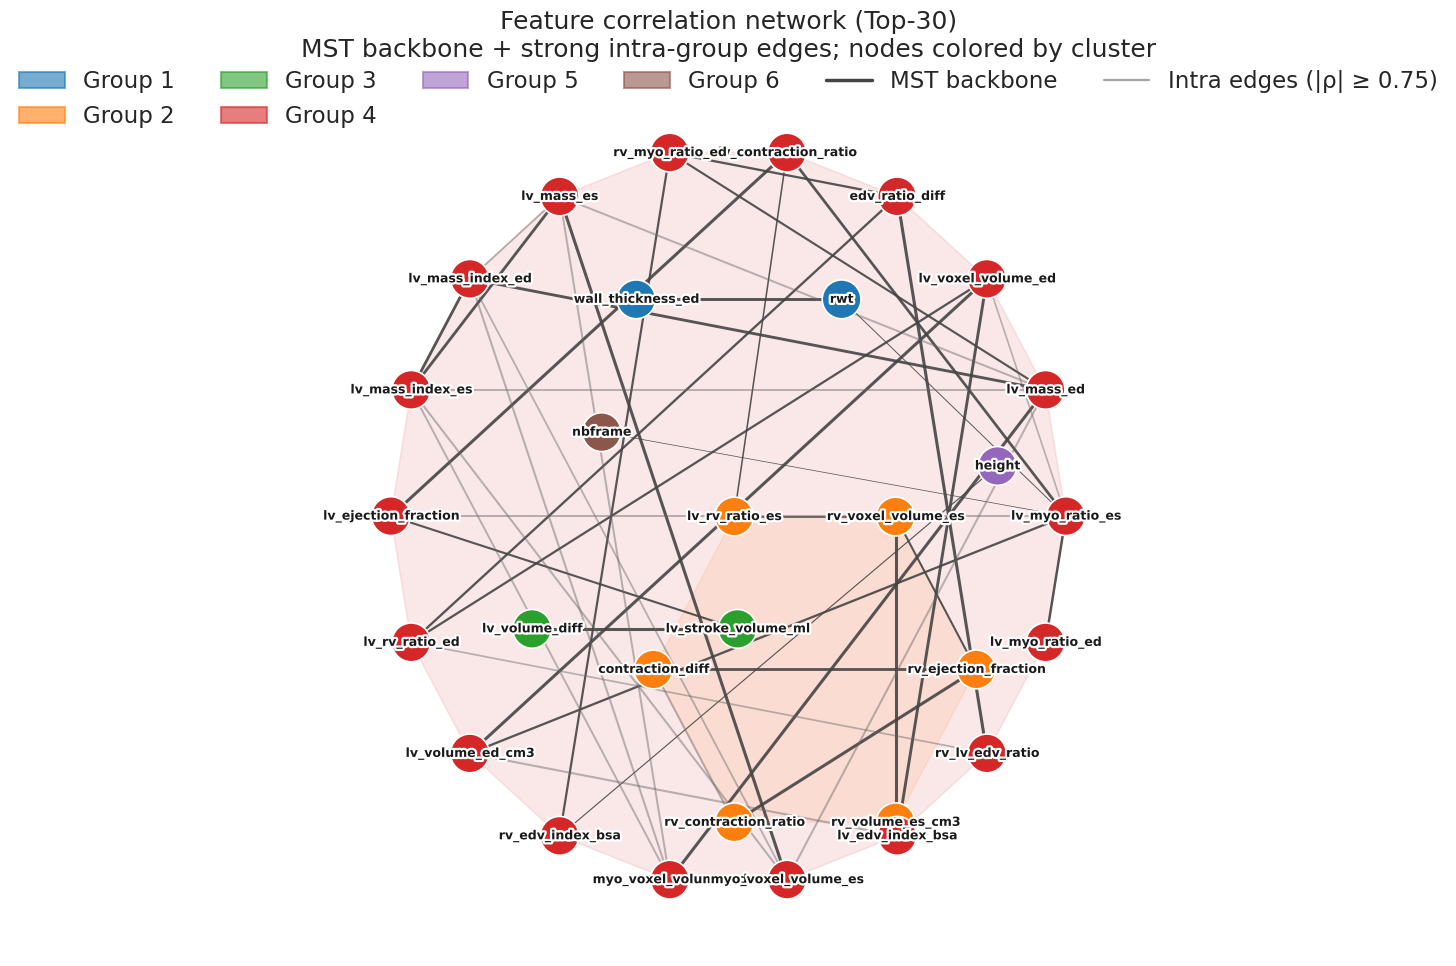

In [ ]:
# =========================
# Publication-ready Feature Network (Top-30)
# MST backbone + strong intra-group edges
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from scipy.spatial import ConvexHull
import matplotlib.patheffects as pe
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# -------- parameters you can tweak --------
N_CLUSTERS     = 6      # جرّب 5/6/7 واختَر الأوضح بصريًا
EDGE_INTRA_THR = 0.75   # روابط إضافية داخل المجموعة (كلما زاد صار أنظف)
RANDOM_SEED    = 42

# -------- ensure we have Top-30 features --------
def get_top30_features(df):
    y = df['class_binary']
    X = df.drop(columns=['patient_id','filename','class','class_code','class_binary'], errors='ignore')
    mask = X.notna().all(axis=1)
    X, y = X.loc[mask], y.loc[mask]
    Xz = StandardScaler().fit_transform(X)
    rfe = RFE(estimator=SVC(kernel='linear', class_weight='balanced', random_state=RANDOM_SEED),
              n_features_to_select=30, step=1)
    rfe.fit(Xz, y)
    return list(X.columns[rfe.support_])

try:
    FEATURES_30 = selected_svm_30
    if len(FEATURES_30) != 30:
        FEATURES_30 = get_top30_features(df)
except NameError:
    FEATURES_30 = get_top30_features(df)

# -------- data matrix for the 30 features --------
X30  = df[FEATURES_30].dropna()
X30z = StandardScaler().fit_transform(X30)

# -------- correlations & distance matrix --------
corr = np.corrcoef(X30z, rowvar=False)
corr = np.clip(0.5*(corr + corr.T), -1.0, 1.0)      # stabilize & symmetrize
dist = 1.0 - np.abs(corr)
np.fill_diagonal(dist, 0.0)
dist = np.clip(0.5*(dist + dist.T), 0.0, 1.0)
Dcond = squareform(dist, checks=False)

# -------- cluster features (colors) --------
Z = linkage(Dcond, method='average')
groups = fcluster(Z, t=N_CLUSTERS, criterion='maxclust')  # 1..K
feat2group = {f:int(g) for f, g in zip(FEATURES_30, groups)}

# -------- full graph (features as nodes, edges carry corr & dist) --------
G = nx.Graph()
for f in FEATURES_30:
    G.add_node(f, group=feat2group[f])
for i, fi in enumerate(FEATURES_30):
    for j in range(i+1, len(FEATURES_30)):
        fj = FEATURES_30[j]
        G.add_edge(fi, fj, corr=float(corr[i, j]), dist=float(dist[i, j]))

# -------- MST backbone over distances (clean structure) --------
MST = nx.minimum_spanning_tree(G, weight='dist')

# -------- extra strong edges inside each group only --------
extra_edges = []
for u, v, d in G.edges(data=True):
    if feat2group[u] == feat2group[v] and abs(d['corr']) >= EDGE_INTRA_THR:
        if not MST.has_edge(u, v):
            extra_edges.append((u, v, d))

# -------- place group centers (meta-graph) --------
meta = nx.Graph()
for g in range(1, N_CLUSTERS+1):
    meta.add_node(g, size=sum(1 for f in FEATURES_30 if feat2group[f]==g))

for u, v, d in MST.edges(data=True):
    gu, gv = feat2group[u], feat2group[v]
    if gu == gv:
        continue
    w = meta.get_edge_data(gu, gv, {}).get('weight', 0.0) + (1.0 - d['dist'])
    c = meta.get_edge_data(gu, gv, {}).get('count', 0) + 1
    meta.add_edge(gu, gv, weight=w, count=c)

for u, v, d in meta.edges(data=True):
    d['weight'] = d['weight']/d['count']

meta_pos = nx.spring_layout(meta, weight='weight', seed=RANDOM_SEED, k=1.0)

# -------- place feature nodes around their group center (small circles) --------
rng = np.random.default_rng(RANDOM_SEED)
pos = {}
for g in range(1, N_CLUSTERS+1):
    members = [n for n in G.nodes() if G.nodes[n]['group']==g]
    if not members:
        continue
    R = 0.35 + 0.07*len(members)               # radius by group size
    theta = np.linspace(0, 2*np.pi, len(members), endpoint=False)
    # order by centrality in MST then by how many extra strong edges
    degM = {n: MST.degree(n) for n in members}
    strength = {n: 0 for n in members}
    for u, v, _ in extra_edges:
        if u in strength: strength[u] += 1
        if v in strength: strength[v] += 1
    members = sorted(members, key=lambda n: (-degM[n], -strength[n], n))
    cx, cy = meta_pos[g]
    for i, n in enumerate(members):
        pos[n] = np.array([cx + R*np.cos(theta[i]), cy + R*np.sin(theta[i])])

# -------- draw --------
palette = sns.color_palette("tab10", n_colors=N_CLUSTERS)
node_colors = [palette[G.nodes[n]['group']-1] for n in G.nodes()]

plt.figure(figsize=(13, 10))
ax = plt.gca()

# (a) group hulls (soft background islands)
for g in range(1, N_CLUSTERS+1):
    pts = np.array([pos[n] for n in G.nodes() if G.nodes[n]['group']==g])
    if len(pts) >= 3:
        hull = ConvexHull(pts)
        poly = plt.Polygon(pts[hull.vertices], closed=True,
                           facecolor=palette[g-1], alpha=0.10,
                           edgecolor=palette[g-1], linewidth=1.2)
        ax.add_patch(poly)

# (b) MST edges (main structure)
nx.draw_networkx_edges(MST, pos,
    width=[2.2*(1.0 - MST[u][v]['dist']) for u, v in MST.edges()],
    alpha=0.9, edge_color="#444444")

# (c) extra strong intra-group edges
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, _ in extra_edges],
    width=[1.6*(1.0 - d['dist']) for _, _, d in extra_edges],
    alpha=0.45, edge_color="#666666")

# (d) nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors,
    node_size=780, edgecolors='white', linewidths=1.2)

# (e) labels with white halo for clarity
texts = nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')
for t in texts.values():
    t.set_path_effects([pe.Stroke(linewidth=3.2, foreground="white"), pe.Normal()])

# legend
group_handles = [Patch(color=palette[i], alpha=0.6, label=f"Group {i+1}") for i in range(N_CLUSTERS)]
h1 = Line2D([0],[0], color="#444", lw=2.5, label="MST backbone")
h2 = Line2D([0],[0], color="#666", lw=1.6, alpha=0.6, label=f"Intra edges (|ρ| ≥ {EDGE_INTRA_THR})")
plt.legend(handles=group_handles+[h1, h2],
           loc='upper center', bbox_to_anchor=(0.5, 1.03),
           ncol=min(N_CLUSTERS+2, 6), frameon=False)

plt.title("Feature correlation network (Top-30)\nMST backbone + strong intra-group edges; nodes colored by cluster", pad=14)
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# --- 1. ميزاتك المختارة (بما فيها weight/height حتى لو مو ضمن الـ30) ---
CHOSEN_7 = [
    'lv_myo_ratio_es',
    'lv_edv_index_bsa',
    'lv_mass_index_es',
    'lv_mass_es',
    'height',
    'lv_contraction_ratio',
    'weight'
]

# --- 2. خذها من الداتا الأصلية ---
X7 = df[CHOSEN_7].dropna()
y7 = df.loc[X7.index, 'class_binary']

# --- 3. اعمل Standardize ---
X7z = pd.DataFrame(StandardScaler().fit_transform(X7), columns=CHOSEN_7)

# --- 4. احسب نفس المقاييس اللي قلناها ---
# (a) متوسط |الارتباط|
C7 = X7z.corr().abs()
mean_abs_corr_7 = (C7.values[np.triu_indices_from(C7,1)]).mean()
print(f"Mean |corr| among chosen-7 = {mean_abs_corr_7:.2f}")

# (b) VIF
import statsmodels.api as sm
def vif(df_):
    v = {}
    for col in df_.columns:
        X = sm.add_constant(df_.drop(columns=[col]))
        y = df_[col]
        r2 = sm.OLS(y, X).fit().rsquared
        v[col] = 1.0/(1.0 - r2 + 1e-9)
    return pd.Series(v).sort_values(ascending=False)

print("\nVIF for chosen-7:\n", vif(X7z))

# (c) مقارنة F1 (7 ميزات vs 30 ميزه)
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score

# الـ30
X30 = df[selected_svm_30].dropna()
y30 = df.loc[X30.index, 'class_binary']
X30z = pd.DataFrame(StandardScaler().fit_transform(X30), columns=selected_svm_30)

cv   = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
clf  = SVC(kernel='linear', class_weight='balanced', random_state=42)

f1_30 = cross_val_score(clf, X30z, y30, scoring='f1_macro', cv=cv).mean()
f1_7  = cross_val_score(clf, X7z,  y7,  scoring='f1_macro', cv=cv).mean()
print(f"\nF1-macro using 30 features: {f1_30:.3f}")
print(f"F1-macro using 7  features: {f1_7:.3f}")
print(f"ΔF1 (7 - 30) = {f1_7 - f1_30:+.3f}")


Mean |corr| among chosen-7 = 0.29

VIF for chosen-7:
 lv_mass_index_es        70.182597
lv_mass_es              66.091162
lv_myo_ratio_es         16.749048
lv_contraction_ratio     7.725519
weight                   6.710827
lv_edv_index_bsa         6.592729
height                   2.758218
dtype: float64

F1-macro using 30 features: 0.925
F1-macro using 7  features: 0.735
ΔF1 (7 - 30) = -0.190


Mounted at /content/drive
=== 5-Fold CV Results on TRAINING SET ===
RandomForest: Accuracy = 1.000 ± 0.000, F1-macro = 1.000 ± 0.000
SVM: Accuracy = 0.967 ± 0.011, F1-macro = 0.952 ± 0.016
MLP: Accuracy = 1.000 ± 0.000, F1-macro = 1.000 ± 0.000
XGBoost: Accuracy = 1.000 ± 0.000, F1-macro = 1.000 ± 0.000
Stacking: Accuracy = 1.000 ± 0.000, F1-macro = 1.000 ± 0.000

=== RandomForest – Validation Report ===
              precision    recall  f1-score   support

          LV      0.912     0.982     0.946       337
          RV      0.891     0.605     0.721        81

    accuracy                          0.909       418
   macro avg      0.901     0.794     0.833       418
weighted avg      0.908     0.909     0.902       418



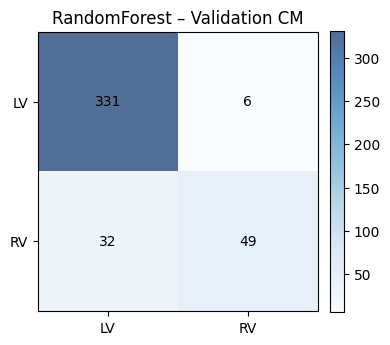


=== RandomForest – Test Report ===
              precision    recall  f1-score   support

          LV      0.881     0.925     0.902        80
          RV      0.625     0.500     0.556        20

    accuracy                          0.840       100
   macro avg      0.753     0.713     0.729       100
weighted avg      0.830     0.840     0.833       100



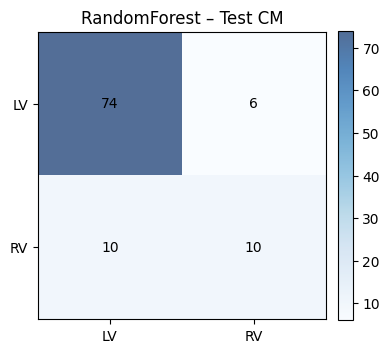


=== SVM – Validation Report ===
              precision    recall  f1-score   support

          LV      0.962     0.982     0.972       337
          RV      0.919     0.840     0.877        81

    accuracy                          0.955       418
   macro avg      0.941     0.911     0.925       418
weighted avg      0.954     0.955     0.954       418



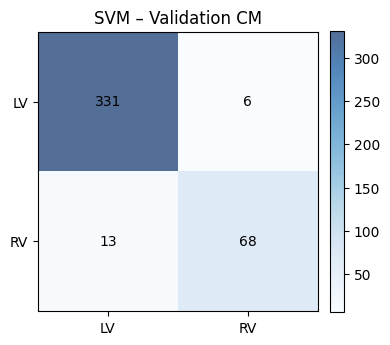


=== SVM – Test Report ===
              precision    recall  f1-score   support

          LV      0.975     0.975     0.975        80
          RV      0.900     0.900     0.900        20

    accuracy                          0.960       100
   macro avg      0.938     0.938     0.938       100
weighted avg      0.960     0.960     0.960       100



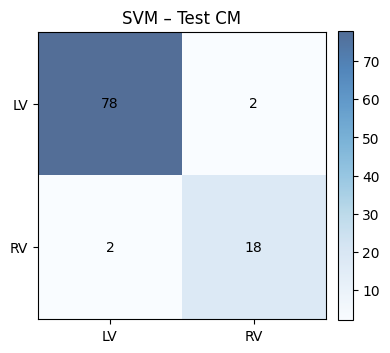


=== MLP – Validation Report ===
              precision    recall  f1-score   support

          LV      0.973     0.958     0.966       337
          RV      0.837     0.889     0.862        81

    accuracy                          0.945       418
   macro avg      0.905     0.924     0.914       418
weighted avg      0.947     0.945     0.946       418



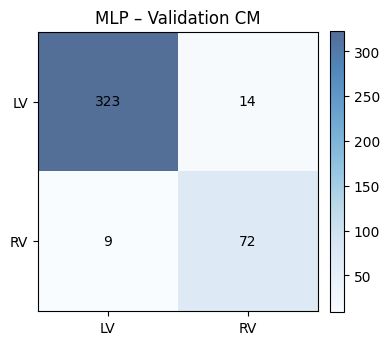


=== MLP – Test Report ===
              precision    recall  f1-score   support

          LV      0.902     0.925     0.914        80
          RV      0.667     0.600     0.632        20

    accuracy                          0.860       100
   macro avg      0.785     0.762     0.773       100
weighted avg      0.855     0.860     0.857       100



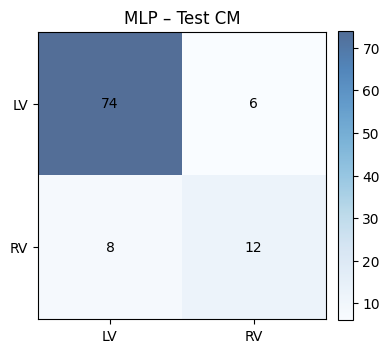


=== XGBoost – Validation Report ===
              precision    recall  f1-score   support

          LV      0.920     0.961     0.940       337
          RV      0.803     0.654     0.721        81

    accuracy                          0.902       418
   macro avg      0.862     0.808     0.831       418
weighted avg      0.898     0.902     0.898       418



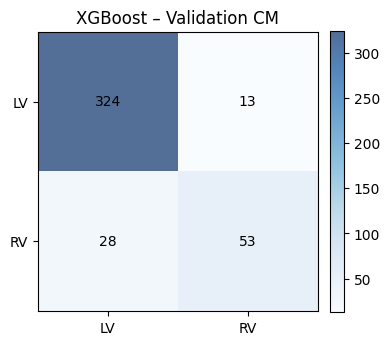


=== XGBoost – Test Report ===
              precision    recall  f1-score   support

          LV      0.900     0.900     0.900        80
          RV      0.600     0.600     0.600        20

    accuracy                          0.840       100
   macro avg      0.750     0.750     0.750       100
weighted avg      0.840     0.840     0.840       100



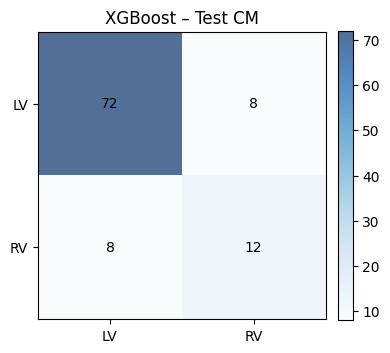


=== Stacking – Validation Report ===
              precision    recall  f1-score   support

          LV      0.961     0.944     0.952       337
          RV      0.782     0.840     0.810        81

    accuracy                          0.923       418
   macro avg      0.871     0.892     0.881       418
weighted avg      0.926     0.923     0.924       418



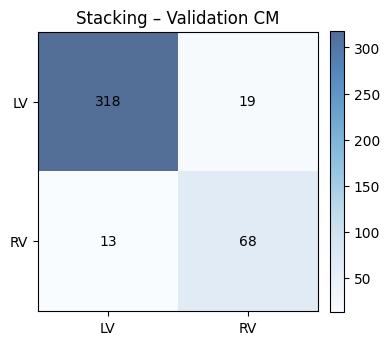


=== Stacking – Test Report ===
              precision    recall  f1-score   support

          LV      0.902     0.925     0.914        80
          RV      0.667     0.600     0.632        20

    accuracy                          0.860       100
   macro avg      0.785     0.762     0.773       100
weighted avg      0.855     0.860     0.857       100



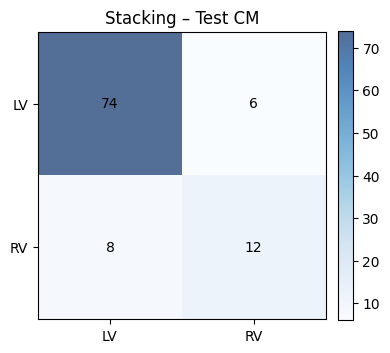

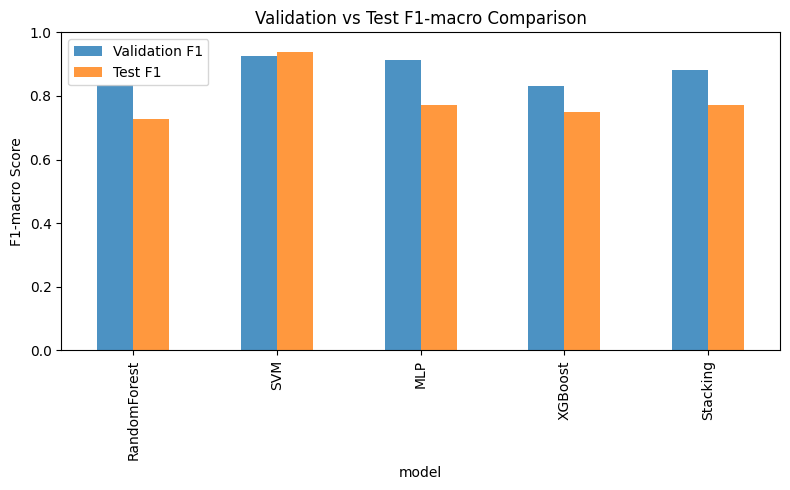


✅ Saved best binary model (SVM) to: /content/drive/MyDrive/ACDC dataset/Classification/modeling/final_binary_model.pkl


In [ ]:
# === 0. Mount Google Drive & set paths ===
from google.colab import drive
import os, warnings, logging, joblib

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Paths
PREPROC_DIR     = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess'
FINAL_SAVE_PATH = '/content/drive/MyDrive/ACDC dataset/Classification/modeling/final_binary_model.pkl'

# Suppress warnings and LightGBM logs
warnings.filterwarnings('ignore')
logging.getLogger('lightgbm').setLevel(logging.ERROR)


# === 1. Imports ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute         import SimpleImputer
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics        import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score
)
from sklearn.calibration    import CalibratedClassifierCV
from sklearn.ensemble       import RandomForestClassifier, StackingClassifier
from sklearn.svm            import SVC
from sklearn.linear_model   import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost                import XGBClassifier

from imblearn.pipeline      import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_validate


# === 2. Load & filter data ===
def load_and_filter(split):
    df = pd.read_csv(os.path.join(PREPROC_DIR, f'linked_{split}_cleaned_v111.csv'))
    return df[df['class_binary'].notna()].reset_index(drop=True)

train, val, test = map(load_and_filter, ['train', 'val', 'test'])


# === 3. Selected Features & Targets ===
FEATURES = [
    'lv_myo_ratio_es',
    'lv_edv_index_bsa',
    'lv_mass_index_es',
    'lv_mass_es',
    'height',
    'lv_contraction_ratio',
    'weight'
]
TARGET = 'class_binary'

X_tr, y_tr = train[FEATURES], train[TARGET]
X_va, y_va = val[FEATURES],   val[TARGET]
X_te, y_te = test[FEATURES],  test[TARGET]

labels = ['LV', 'RV']


# === 4. Define & Calibrate Models ===
rf = CalibratedClassifierCV(
    RandomForestClassifier(n_estimators=300, max_depth=20,
                           class_weight='balanced', random_state=42),
    cv=5, method='isotonic'
)
svm = CalibratedClassifierCV(
    SVC(kernel='rbf', C=2.0, gamma='scale',
        class_weight='balanced', probability=True, random_state=42),
    cv=5, method='sigmoid'
)
mlp = CalibratedClassifierCV(
    MLPClassifier(hidden_layer_sizes=(128,64,32), activation='relu',
                  alpha=1e-4, learning_rate_init=0.003,
                  max_iter=1500, early_stopping=True,
                  random_state=42),
    cv=5, method='sigmoid'
)
xgb = CalibratedClassifierCV(
    XGBClassifier(n_estimators=300, max_depth=5,
                  learning_rate=0.05, subsample=0.9,
                  colsample_bytree=0.8, use_label_encoder=False,
                  eval_metric='logloss', random_state=42),
    cv=5, method='sigmoid'
)
stack = StackingClassifier(
    estimators=[('rf', rf), ('svm', svm), ('mlp', mlp), ('xgb', xgb)],
    final_estimator=LogisticRegression(C=1.0,
                                       class_weight='balanced',
                                       max_iter=1000,
                                       random_state=42),
    cv=5, passthrough=True, n_jobs=-1
)

models = {
    'RandomForest': rf,
    'SVM':          svm,
    'MLP':          mlp,
    'XGBoost':      xgb,
    'Stacking':     stack
}


# === 5. 5-Fold CV Results on TRAINING SET ===
print("=== 5-Fold CV Results on TRAINING SET ===")
for name, model in models.items():
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler',   StandardScaler()),
        ('smote',    SMOTE(random_state=42)),
        ('clf',      model)
    ])
    cv_res = cross_validate(
        pipe, X_tr, y_tr,
        cv=5,
        scoring=['accuracy', 'f1_macro'],
        return_train_score=False
    )
    acc_mean = cv_res['test_accuracy'].mean()
    acc_std  = cv_res['test_accuracy'].std()
    f1_mean  = cv_res['test_f1_macro'].mean()
    f1_std   = cv_res['test_f1_macro'].std()
    print(f"{name}: Accuracy = {acc_mean:.3f} ± {acc_std:.3f}, "
          f"F1-macro = {f1_mean:.3f} ± {f1_std:.3f}")


# === 6. Train on Full TRAINING SET & Evaluate on Validation/Test ===
compare = {'model': [], 'Validation F1': [], 'Test F1': []}
pipes = {}

for name, model in models.items():
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler',   StandardScaler()),
        ('smote',    SMOTE(random_state=42)),
        ('clf',      model)
    ])
    pipe.fit(X_tr, y_tr)
    pipes[name] = pipe

    # Validation
    yv = pipe.predict(X_va)
    f1_v = f1_score(y_va, yv, average='macro')
    print(f"\n=== {name} – Validation Report ===")
    print(classification_report(y_va, yv, target_names=labels, digits=3))

    cm_v = confusion_matrix(y_va, yv)
    fig, ax = plt.subplots(figsize=(4,4))
    im = ax.imshow(cm_v, cmap='Blues', alpha=0.7)
    ax.set_title(f'{name} – Validation CM')
    ax.set_xticks(range(2)); ax.set_xticklabels(labels)
    ax.set_yticks(range(2)); ax.set_yticklabels(labels)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm_v[i, j], ha='center', va='center')
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout(); plt.show()

    # Test
    yt = pipe.predict(X_te)
    f1_t = f1_score(y_te, yt, average='macro')
    print(f"\n=== {name} – Test Report ===")
    print(classification_report(y_te, yt, target_names=labels, digits=3))

    cm_t = confusion_matrix(y_te, yt)
    fig, ax = plt.subplots(figsize=(4,4))
    im = ax.imshow(cm_t, cmap='Blues', alpha=0.7)
    ax.set_title(f'{name} – Test CM')
    ax.set_xticks(range(2)); ax.set_xticklabels(labels)
    ax.set_yticks(range(2)); ax.set_yticklabels(labels)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm_t[i, j], ha='center', va='center')
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout(); plt.show()

    compare['model'].append(name)
    compare['Validation F1'].append(f1_v)
    compare['Test F1'].append(f1_t)


# === 7. Comparison Bar Chart ===
df_cmp = pd.DataFrame(compare).set_index('model')
fig, ax = plt.subplots(figsize=(8,5))
df_cmp.plot.bar(ax=ax, alpha=0.8)
ax.set_ylim(0,1)
ax.set_ylabel('F1-macro Score')
ax.set_title('Validation vs Test F1-macro Comparison')
ax.legend(title='')
plt.tight_layout(); plt.show()


# === 8. Save Best Model ===
best_idx  = compare['Test F1'].index(max(compare['Test F1']))
best_name = compare['model'][best_idx]
best_pipe = pipes[best_name]
joblib.dump(best_pipe, FINAL_SAVE_PATH)
print(f"\n✅ Saved best binary model ({best_name}) to: {FINAL_SAVE_PATH}")



Mounted at /content/drive
✅ ROC curve saved to: /content/drive/MyDrive/figures/best_model_roc_binary.png


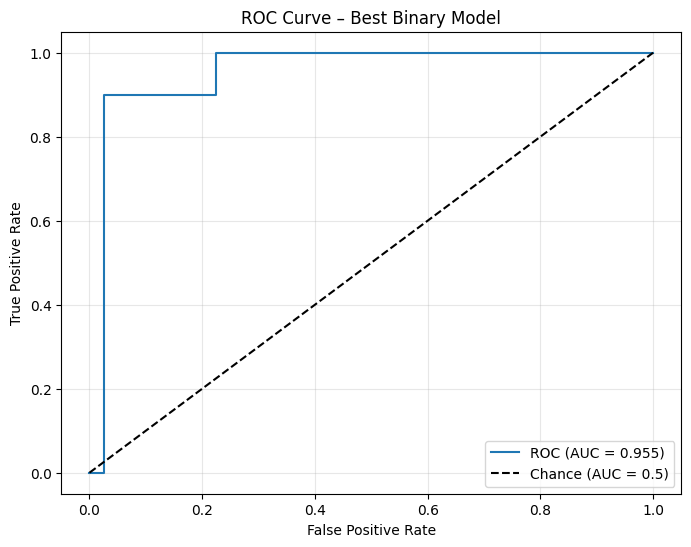

In [ ]:
# === (Optional) Mount Google Drive in Colab ===
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)  # Mount the user's Drive for read/write
except ModuleNotFoundError:
    pass  # Not running in Colab, skip mounting

import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# === Define paths ===
PREPROC_DIR = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess'
MODEL_PATH  = '/content/drive/MyDrive/ACDC dataset/Classification/modeling/final_binary_model.pkl'
FIGURES_DIR = '/content/drive/MyDrive/figures'

# Create figures directory if it doesn't exist
os.makedirs(FIGURES_DIR, exist_ok=True)

# === Load test dataset ===
df_test = pd.read_csv(os.path.join(PREPROC_DIR, 'linked_test_cleaned_v111.csv'))
df_test = df_test[df_test['class_binary'].notna()].reset_index(drop=True)



FEATURES = [
    'lv_myo_ratio_es',
    'lv_edv_index_bsa',
    'lv_mass_index_es',
    'lv_mass_es',
    'height',
    'lv_contraction_ratio',
    'weight'
]
X_te = df_test[FEATURES]            # Test features
y_te = df_test['class_binary']      # Test labels (binary: 0/1)

# === Load the best model ===
best_pipe = joblib.load(MODEL_PATH)  # Load the saved pipeline with preprocessing + classifier

# === Compute ROC curve ===
y_prob = best_pipe.predict_proba(X_te)[:, 1]  # Predicted probability for positive class
fpr, tpr, _ = roc_curve(y_te, y_prob)         # False/True Positive Rates
roc_auc = auc(fpr, tpr)                       # Compute area under the curve

# === Plot ROC curve ===
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')  # ROC line with AUC in label
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.5)')  # Diagonal chance line
plt.xlabel('False Positive Rate')        # X-axis label
plt.ylabel('True Positive Rate')         # Y-axis label
plt.title('ROC Curve – Best Binary Model')  # Plot title
plt.legend(loc='lower right')            # Show legend in lower right
plt.grid(alpha=0.3)                      # Add a light grid for readability

# === Save the figure to Drive ===
roc_path = os.path.join(FIGURES_DIR, 'best_model_roc_binary.png')
plt.savefig(roc_path, bbox_inches='tight')  # Save with tight bounding box
print(f"✅ ROC curve saved to: {roc_path}")

# === Display the plot ===
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.metrics import confusion_matrix

# === Ensure figures directory exists on Drive ===
os.makedirs('/content/drive/MyDrive/figures', exist_ok=True)

# === Save Best Model Confusion Matrix (Test) ===
best_cm = confusion_matrix(y_te, best_pipe.predict(X_te))  # Compute confusion matrix for binary test set
fig, ax = plt.subplots(figsize=(4, 4))
im = ax.imshow(best_cm, cmap='Blues', alpha=0.7)
ax.set_title('Best Model – Test Confusion Matrix')
ax.set_xticks(range(2))
ax.set_xticklabels(labels)  # labels = ['LV', 'RV']
ax.set_yticks(range(2))
ax.set_yticklabels(labels)

# Annotate each cell
for i in range(2):
    for j in range(2):
        ax.text(j, i, best_cm[i, j], ha='center', va='center', color='black')

plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()

# Save confusion matrix figure
cm_path = '/content/drive/MyDrive/figures/best_binary_confusion_matrix.jpg'
fig.savefig(cm_path, dpi=600, format='jpg')
plt.close(fig)

# === Save Validation vs Test F1-macro Comparison ===
df_cmp = pd.DataFrame(compare).set_index('model')

fig, ax = plt.subplots(figsize=(8, 5))
df_cmp.plot.bar(ax=ax, alpha=0.8)
ax.set_ylim(0, 1)
ax.set_ylabel('F1-macro Score')
ax.set_title('Validation vs Test F1-macro Comparison (Binary)')
ax.legend(title='')

plt.tight_layout()
chart_path = '/content/drive/MyDrive/figures/binary_validation_vs_test_f1_comparison.jpg'
fig.savefig(chart_path, dpi=600, format='jpg')
plt.close(fig)

print(f"✅ Saved confusion matrix to: {cm_path}")
print(f"✅ Saved F1-score comparison chart to: {chart_path}")


✅ Saved confusion matrix to: /content/drive/MyDrive/figures/best_binary_confusion_matrix.jpg
✅ Saved F1-score comparison chart to: /content/drive/MyDrive/figures/binary_validation_vs_test_f1_comparison.jpg


Mounted at /content/drive


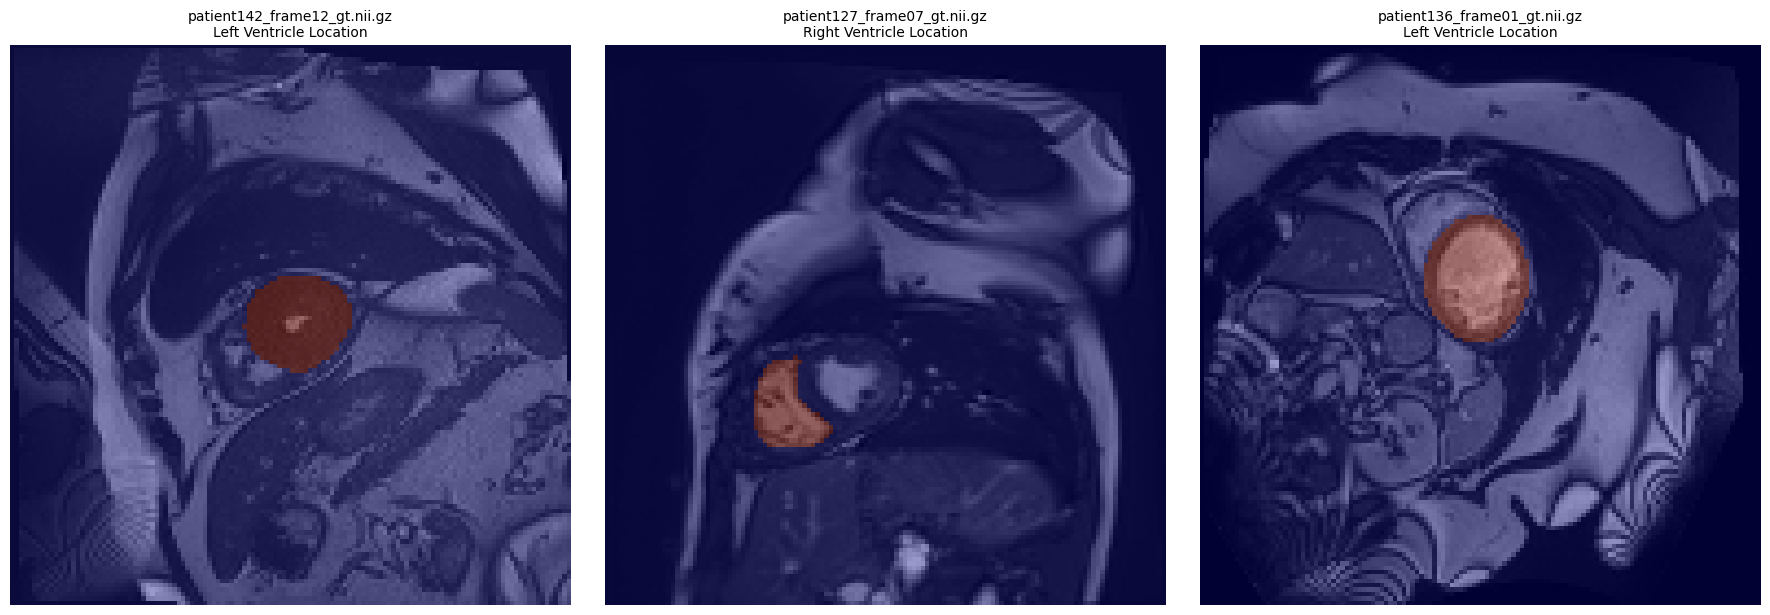

In [ ]:
# === (Optional) Mount Google Drive in Colab ===
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)  # Mount Drive for read/write
except ModuleNotFoundError:
    pass  # Not running in Colab, skip mounting

import os
import joblib
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt

# === Define paths ===
PREPROC_CSV = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_test_cleaned_v111.csv'
MODEL_PATH  = '/content/drive/MyDrive/ACDC dataset/Classification/modeling/final_binary_model.pkl'
IMAGE_DIR   = '/content/drive/MyDrive/ACDC dataset/testing/Normalized_Resampled_Images'
MASK_DIR    = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess/Feature_Extraction_Test'

# === Features for the binary model ===
features = [
    'lv_myo_ratio_es',
    'lv_edv_index_bsa',
    'lv_mass_index_es',
    'lv_mass_es',
    'height',
    'lv_contraction_ratio',
    'weight'
]

# === Load test data and trained model ===
df_test   = pd.read_csv(PREPROC_CSV)             # Load the updated test CSV
best_pipe = joblib.load(MODEL_PATH)              # Load the saved binary pipeline

# === Select 3 random samples ===
samples = df_test.sample(3, random_state=42)     # Fix seed for reproducibility

# === Plot each sample with mask overlay ===
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (_, row) in zip(axes, samples.iterrows()):
    fname = row['filename']                      # File name for this sample
    x     = row[features].values.reshape(1, -1) # Feature vector for prediction

    # Predict class: 1 = RV, 0 = LV
    pred    = best_pipe.predict(x)[0]
    loc_str = 'Right Ventricle Location' if pred == 1 else 'Left Ventricle Location'

    # Load the MRI image and corresponding segmentation mask
    img = nib.load(os.path.join(IMAGE_DIR, fname.replace('_gt', ''))).get_fdata()
    msk = nib.load(os.path.join(MASK_DIR, fname)).get_fdata()
    slice_z = img.shape[0] // 2                  # Use the middle slice

    # Prepare overlay mask based on prediction
    mask_slice = msk[slice_z]
    if pred == 1:
        overlay = (mask_slice == 1).astype(float)                # RV label = 1
    else:
        overlay = ((mask_slice == 2) | (mask_slice == 3)).astype(float)  # LV (2) + MYO (3)

    # Display the MRI slice and overlay
    ax.imshow(img[slice_z], cmap='gray')        # Show grayscale image
    ax.imshow(overlay, cmap='jet', alpha=0.4)   # Overlay in color with transparency
    ax.set_title(f'{fname}\n{loc_str}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()


# ***Training, Evaluating, and Selecting the Best Multi-class Classifier***


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


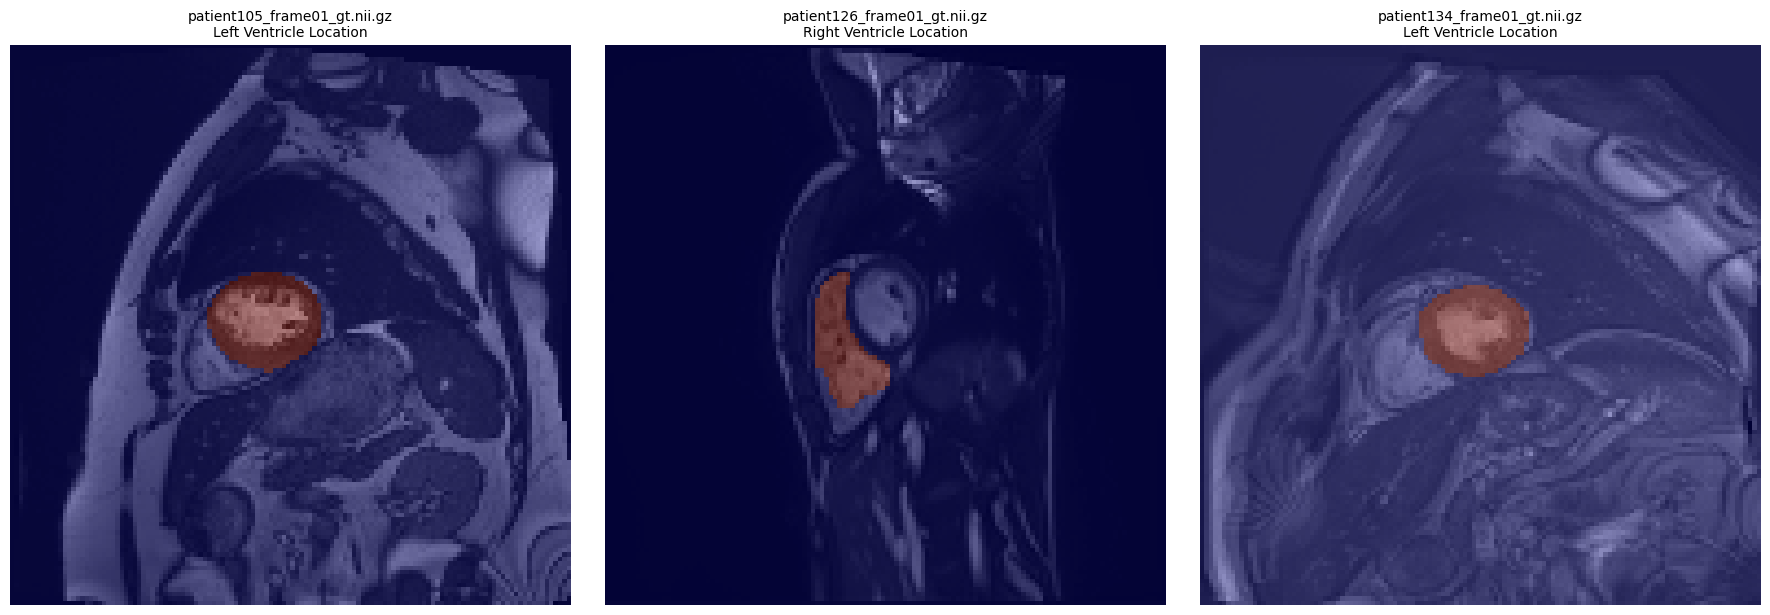

In [ ]:
# === Load test data and trained model ===
df_test   = pd.read_csv(PREPROC_CSV)             # Load the updated test CSV
best_pipe = joblib.load(MODEL_PATH)              # Load the saved binary pipeline

# === Select 3 random samples (different each run) ===
samples = df_test.sample(3)     # Now random each run

# === Plot each sample with mask overlay ===
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (_, row) in zip(axes, samples.iterrows()):
    fname = row['filename']
    x     = row[features].values.reshape(1, -1)

    # Predict class: 1 = RV, 0 = LV
    pred    = best_pipe.predict(x)[0]
    loc_str = 'Right Ventricle Location' if pred == 1 else 'Left Ventricle Location'

    # Load the MRI image and corresponding segmentation mask
    img = nib.load(os.path.join(IMAGE_DIR, fname.replace('_gt', ''))).get_fdata()
    msk = nib.load(os.path.join(MASK_DIR, fname)).get_fdata()
    slice_z = img.shape[0] // 2

    # Prepare overlay mask based on prediction
    mask_slice = msk[slice_z]
    if pred == 1:
        overlay = (mask_slice == 1).astype(float)                # RV
    else:
        overlay = ((mask_slice == 2) | (mask_slice == 3)).astype(float)  # LV + MYO

    ax.imshow(img[slice_z], cmap='gray')
    ax.imshow(overlay, cmap='jet', alpha=0.4)
    ax.set_title(f'{fname}\n{loc_str}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_cleaned_v111.csv')
print(df.columns.tolist())

['patient_id', 'ed_frame', 'es_frame', 'class', 'height', 'nbframe', 'weight', 'bmi', 'filename', 'rv_voxel_volume', 'myo_voxel_volume', 'lv_voxel_volume', 'lv_volume_cm3', 'rv_volume_cm3', 'myo_volume_cm3', 'eccentricity_ed', 'eccentricity_es', 'eccentricity_diff', 'lv_voxel_volume_ed', 'rv_voxel_volume_ed', 'myo_voxel_volume_ed', 'lv_voxel_volume_es', 'rv_voxel_volume_es', 'myo_voxel_volume_es', 'lv_volume_ed_cm3', 'lv_volume_es_cm3', 'rv_volume_ed_cm3', 'rv_volume_es_cm3', 'lv_stroke_volume_ml', 'lv_ejection_fraction', 'rv_stroke_volume_ml', 'rv_ejection_fraction', 'lv_contraction_ratio', 'rv_contraction_ratio', 'contraction_diff', 'edv_ratio_diff', 'stroke_symmetry', 'rv_lv_ratio_ed', 'lv_myo_ratio_ed', 'rv_lv_ratio_es', 'lv_myo_ratio_es', 'lv_mass_ed', 'lv_mass_es', 'bsa', 'lv_mass_index_ed', 'lv_mass_index_es', 'wall_thickness_ed', 'wall_thickness_es', 'lv_volume_diff', 'rv_volume_diff', 'myo_volume_diff', 'lv_rv_ratio_ed', 'lv_rv_ratio_es', 'rv_myo_ratio_ed', 'rwt', 'myo_voxel_v

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# 1. مقياس الميزات
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. نختار k=8 بدل 'all' أو 10
selector = SelectKBest(score_func=f_classif, k=8)
selector.fit(X_scaled, y)

# 3. نطبع الميزات المُختارة من قائمتك
my_feats = [
   'lv_contraction_ratio','lv_mass_index_ed','lv_myo_ratio_ed',
   'myo_voxel_volume_ed','lv_voxel_volume_es','lv_myo_ratio_es',
   'lv_rv_ratio_ed','lv_mass_es'
]
mask = selector.get_support(indices=False)
chosen = [f for f, m in zip(X.columns, mask) if m and f in my_feats]
print("Selected from your list:", chosen)


Selected from your list: ['myo_voxel_volume_ed']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 0 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# --- 1. Load data ---
CSV_PATH = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_cleaned_v111.csv'
df = pd.read_csv(CSV_PATH)
exclude = ['patient_id','filename','class','class_code','class_binary']
X_all = df.drop(columns=exclude).replace([np.inf,-np.inf],np.nan).fillna(0)
y = df['class_binary']

# Standardize once
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

# Common CV splitter
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



estimator = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
n_feats = 13  # عدد الميزات المطلوب
rfe = RFE(estimator, n_features_to_select=n_feats)
rfe.fit(X_scaled, y)
rfe_features = X_all.columns[rfe.support_].tolist()

print("RFE-selected features:")
print(rfe_features)


X_rfe = rfe.transform(X_scaled)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
rfe_scores = cross_val_score(mlp, X_rfe, y, cv=cv, scoring='f1_macro')
print(f"MLP with RFE features: F1_macro = {rfe_scores.mean():.3f} ± {rfe_scores.std():.3f}")

# --- 2B. L1-based SelectFromModel ---
# لوجريج بعقوبة L1 لاختيار الميزات التي أوزانها != 0
l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
sfm = SelectFromModel(l1)
sfm.fit(X_scaled, y)
l1_features = X_all.columns[sfm.get_support()].tolist()

print("\nL1-based selected features:")
print(l1_features)


X_l1 = sfm.transform(X_scaled)
l1_scores = cross_val_score(mlp, X_l1, y, cv=cv, scoring='f1_macro')
print(f"MLP with L1-selected features: F1_macro = {l1_scores.mean():.3f} ± {l1_scores.std():.3f}")


RFE-selected features:
['nbframe', 'rv_voxel_volume_ed', 'rv_volume_ed_cm3', 'lv_ejection_fraction', 'edv_ratio_diff', 'lv_myo_ratio_ed', 'lv_myo_ratio_es', 'wall_thickness_ed', 'lv_volume_diff', 'lv_rv_ratio_ed', 'rwt', 'rv_edv_index_bsa', 'rv_lv_edv_ratio']
MLP with RFE features: F1_macro = 1.000 ± 0.000

L1-based selected features:
['es_frame', 'height', 'nbframe', 'rv_voxel_volume', 'myo_voxel_volume', 'lv_voxel_volume', 'lv_volume_cm3', 'rv_volume_cm3', 'myo_volume_cm3', 'eccentricity_diff', 'lv_voxel_volume_ed', 'rv_voxel_volume_ed', 'rv_voxel_volume_es', 'myo_voxel_volume_es', 'lv_volume_ed_cm3', 'rv_volume_ed_cm3', 'rv_volume_es_cm3', 'lv_stroke_volume_ml', 'lv_ejection_fraction', 'rv_ejection_fraction', 'lv_contraction_ratio', 'rv_contraction_ratio', 'edv_ratio_diff', 'stroke_symmetry', 'rv_lv_ratio_ed', 'lv_myo_ratio_ed', 'lv_myo_ratio_es', 'lv_mass_es', 'bsa', 'lv_mass_index_es', 'wall_thickness_ed', 'wall_thickness_es', 'lv_volume_diff', 'myo_volume_diff', 'lv_rv_ratio_ed',

In [ ]:
import pandas as pd

# 1. Load cleaned data
CSV_PATH = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_cleaned_v111.csv'
df = pd.read_csv(CSV_PATH)

# 2. Define the two selected‐feature lists
rfe_feats = [
    'nbframe', 'rv_voxel_volume_ed', 'rv_volume_ed_cm3',
    'lv_ejection_fraction', 'edv_ratio_diff', 'lv_myo_ratio_ed',
    'lv_myo_ratio_es', 'wall_thickness_ed', 'lv_volume_diff',
    'lv_rv_ratio_ed', 'rwt', 'rv_edv_index_bsa', 'rv_lv_edv_ratio'
]

l1_feats = [
    'es_frame', 'height', 'nbframe', 'rv_voxel_volume', 'myo_voxel_volume',
    'lv_voxel_volume', 'lv_volume_cm3', 'rv_volume_cm3', 'myo_volume_cm3',
    'eccentricity_diff', 'lv_voxel_volume_ed', 'rv_voxel_volume_ed',
    'rv_voxel_volume_es', 'myo_voxel_volume_es', 'lv_volume_ed_cm3',
    'rv_volume_ed_cm3', 'rv_volume_es_cm3', 'lv_stroke_volume_ml',
    'lv_ejection_fraction', 'rv_ejection_fraction', 'lv_contraction_ratio',
    'rv_contraction_ratio', 'edv_ratio_diff', 'stroke_symmetry',
    'rv_lv_ratio_ed', 'lv_myo_ratio_ed', 'lv_myo_ratio_es', 'lv_mass_es',
    'bsa', 'lv_mass_index_es', 'wall_thickness_ed', 'wall_thickness_es',
    'lv_volume_diff', 'myo_volume_diff', 'lv_rv_ratio_ed', 'lv_rv_ratio_es',
    'rwt', 'myo_voxel_volume_diff', 'lv_mass_diff', 'rv_edv_index_bsa',
    'lv_edv_index_bsa', 'rv_lv_edv_ratio'
]

# 3. Compute intersection & union
intersection = sorted(set(rfe_feats) & set(l1_feats))
union        = sorted(set(rfe_feats) | set(l1_feats))

print("Features selected by BOTH RFE and L1 (intersection):")
print(intersection)

print("\nAll features selected by either method (union):")
print(union)

# 4. Subset for modeling (choose intersection or union as needed)
X_intersect = df[intersection].copy()
X_union     = df[union].copy()
y           = df['class_binary']

print(f"\nX_intersect shape: {X_intersect.shape}")
print(f"X_union     shape: {X_union.shape}")



Features selected by BOTH RFE and L1 (intersection):
['edv_ratio_diff', 'lv_ejection_fraction', 'lv_myo_ratio_ed', 'lv_myo_ratio_es', 'lv_rv_ratio_ed', 'lv_volume_diff', 'nbframe', 'rv_edv_index_bsa', 'rv_lv_edv_ratio', 'rv_volume_ed_cm3', 'rv_voxel_volume_ed', 'rwt', 'wall_thickness_ed']

All features selected by either method (union):
['bsa', 'eccentricity_diff', 'edv_ratio_diff', 'es_frame', 'height', 'lv_contraction_ratio', 'lv_edv_index_bsa', 'lv_ejection_fraction', 'lv_mass_diff', 'lv_mass_es', 'lv_mass_index_es', 'lv_myo_ratio_ed', 'lv_myo_ratio_es', 'lv_rv_ratio_ed', 'lv_rv_ratio_es', 'lv_stroke_volume_ml', 'lv_volume_cm3', 'lv_volume_diff', 'lv_volume_ed_cm3', 'lv_voxel_volume', 'lv_voxel_volume_ed', 'myo_volume_cm3', 'myo_volume_diff', 'myo_voxel_volume', 'myo_voxel_volume_diff', 'myo_voxel_volume_es', 'nbframe', 'rv_contraction_ratio', 'rv_edv_index_bsa', 'rv_ejection_fraction', 'rv_lv_edv_ratio', 'rv_lv_ratio_ed', 'rv_volume_cm3', 'rv_volume_ed_cm3', 'rv_volume_es_cm3', 'rv

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# 1. Load cleaned data
CSV_PATH = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_cleaned_v111.csv'
df = pd.read_csv(CSV_PATH)

# 2. Define intersection features (selected by both RFE and L1)
intersect_feats = [
    'edv_ratio_diff',
    'lv_ejection_fraction',
    'lv_myo_ratio_ed',
    'lv_myo_ratio_es',
    'lv_rv_ratio_ed',
    'lv_volume_diff',
    'nbframe',
    'rv_edv_index_bsa',
    'rv_lv_edv_ratio',
    'rv_volume_ed_cm3',
    'rv_voxel_volume_ed',
    'rwt',
    'wall_thickness_ed'
]

# 3. Subset X and y
X = df[intersect_feats].replace([np.inf, -np.inf], np.nan).fillna(0)
y = df['class_binary']

# 4. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Define the classifier and CV
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 6. Evaluate with cross‐validation
scores = cross_val_score(mlp, X_scaled, y, cv=cv, scoring='f1_macro')
print(f"MLP on intersection features: F1_macro = {scores.mean():.3f} ± {scores.std():.3f}")

# 7. (Optional) Fit on full data and inspect coefficients
mlp.fit(X_scaled, y)
print("Trained MLP layers sizes:", mlp.hidden_layer_sizes)


MLP on intersection features: F1_macro = 1.000 ± 0.000
Trained MLP layers sizes: (50,)


In [ ]:
import pandas as pd

# 1. Load cleaned data
CSV_PATH = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess/linked_train_cleaned_v111.csv'
df = pd.read_csv(CSV_PATH)

# 2. Define final feature set (intersection of RFE & L1 selection)
final_features = [
    'nbframe',
    'edv_ratio_diff',
    'rv_edv_index_bsa',
    'rv_lv_edv_ratio',
    'rv_volume_ed_cm3',
    'rv_voxel_volume_ed',
    'rwt',               # Relative Wall Thickness
    'wall_thickness_ed',
    'lv_ejection_fraction',
    'lv_myo_ratio_ed',
    'lv_myo_ratio_es',
    'lv_rv_ratio_ed',
    'lv_volume_diff'
]

# 3. Subset DataFrame for modeling
X_final = df[final_features].copy()
y_final = df['class_binary']

# 4. Quick sanity check
print("X_final shape:", X_final.shape)
print("Features used:", final_features)


X_final shape: (1672, 13)
Features used: ['nbframe', 'edv_ratio_diff', 'rv_edv_index_bsa', 'rv_lv_edv_ratio', 'rv_volume_ed_cm3', 'rv_voxel_volume_ed', 'rwt', 'wall_thickness_ed', 'lv_ejection_fraction', 'lv_myo_ratio_ed', 'lv_myo_ratio_es', 'lv_rv_ratio_ed', 'lv_volume_diff']


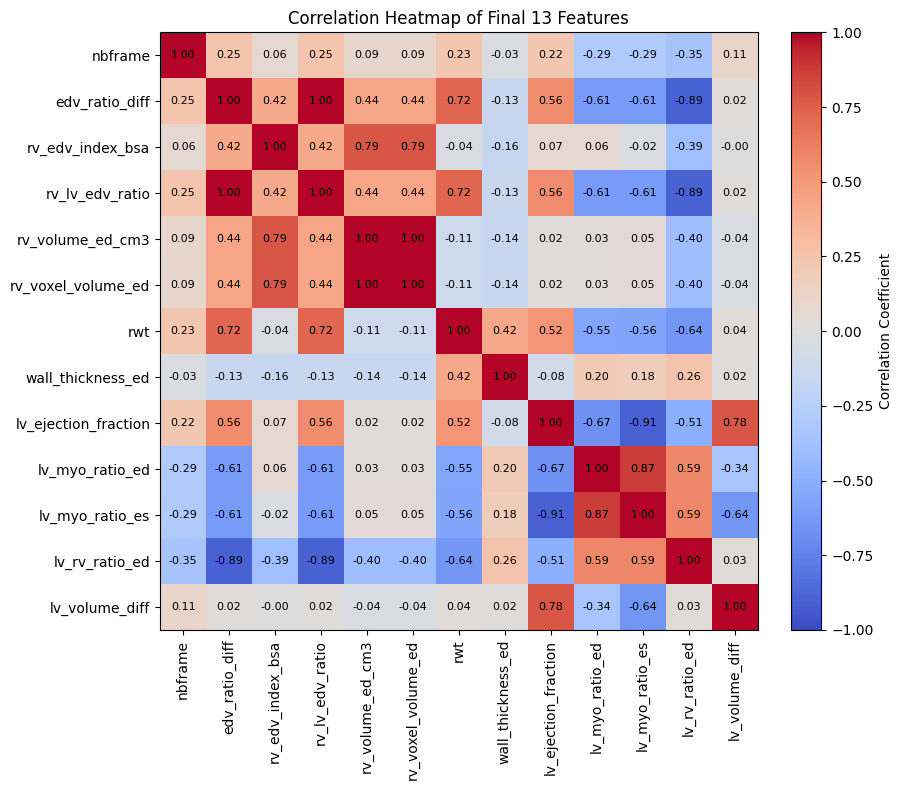

In [ ]:

final_features = [
    'nbframe','edv_ratio_diff','rv_edv_index_bsa','rv_lv_edv_ratio',
    'rv_volume_ed_cm3','rv_voxel_volume_ed','rwt','wall_thickness_ed',
    'lv_ejection_fraction','lv_myo_ratio_ed','lv_myo_ratio_es',
    'lv_rv_ratio_ed','lv_volume_diff'
]
X_final = df[final_features].copy()

import matplotlib.pyplot as plt

# 1. Compute correlation matrix
corr = X_final.corr()

# 2. Plot annotated heatmap
plt.figure(figsize=(10, 8))
im = plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)

features = X_final.columns.tolist()
plt.xticks(range(len(features)), features, rotation=90)
plt.yticks(range(len(features)), features)

for i in range(len(features)):
    for j in range(len(features)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', fontsize=8)

plt.colorbar(im, fraction=0.046, pad=0.04, label='Correlation Coefficient')
plt.title("Correlation Heatmap of Final 13 Features")
plt.tight_layout()
plt.show()



Mounted at /content/drive
=== 5-Fold CV Results on TRAINING SET ===
RandomForest: Accuracy = 1.000 ± 0.000, F1-macro = 1.000 ± 0.000
SVM: Accuracy = 0.988 ± 0.007, F1-macro = 0.987 ± 0.008
LightGBM: Accuracy = 1.000 ± 0.000, F1-macro = 1.000 ± 0.000
MLP: Accuracy = 0.999 ± 0.003, F1-macro = 0.998 ± 0.003
Stacking: Accuracy = 1.000 ± 0.000, F1-macro = 1.000 ± 0.000

=== RandomForest – Validation Report ===
              precision    recall  f1-score   support

         NOR      0.920     0.896     0.908        77
         DCM      0.885     0.939     0.911        98
         HCM      0.961     0.974     0.967        76
        MINF      0.864     0.814     0.838        86

    accuracy                          0.905       337
   macro avg      0.907     0.906     0.906       337
weighted avg      0.905     0.905     0.904       337



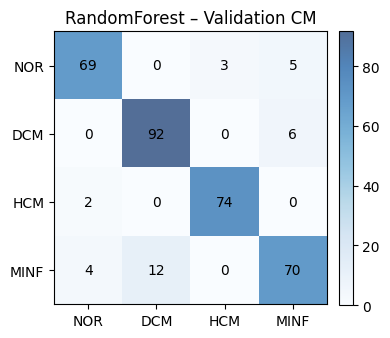


=== RandomForest – Test Report ===
              precision    recall  f1-score   support

         NOR      0.900     0.900     0.900        20
         DCM      0.909     1.000     0.952        20
         HCM      0.900     0.900     0.900        20
        MINF      1.000     0.900     0.947        20

    accuracy                          0.925        80
   macro avg      0.927     0.925     0.925        80
weighted avg      0.927     0.925     0.925        80



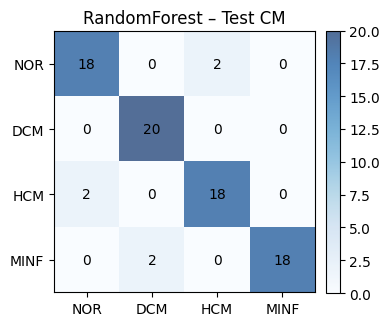


=== SVM – Validation Report ===
              precision    recall  f1-score   support

         NOR      0.856     1.000     0.922        77
         DCM      0.852     1.000     0.920        98
         HCM      0.944     0.882     0.912        76
        MINF      1.000     0.709     0.830        86

    accuracy                          0.899       337
   macro avg      0.913     0.898     0.896       337
weighted avg      0.911     0.899     0.896       337



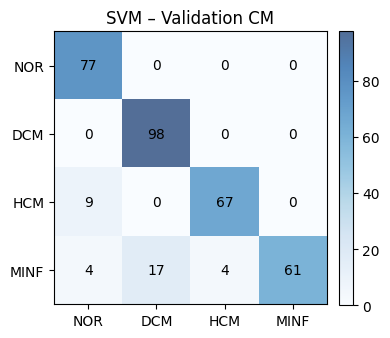


=== SVM – Test Report ===
              precision    recall  f1-score   support

         NOR      0.909     1.000     0.952        20
         DCM      0.818     0.900     0.857        20
         HCM      1.000     0.900     0.947        20
        MINF      0.889     0.800     0.842        20

    accuracy                          0.900        80
   macro avg      0.904     0.900     0.900        80
weighted avg      0.904     0.900     0.900        80



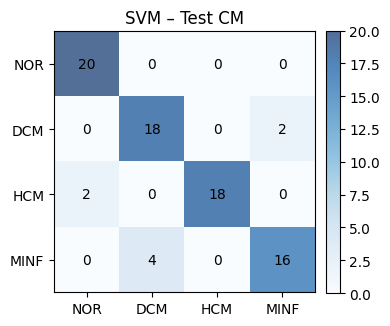


=== LightGBM – Validation Report ===
              precision    recall  f1-score   support

         NOR      0.920     0.896     0.908        77
         DCM      0.886     0.949     0.916        98
         HCM      0.961     0.974     0.967        76
        MINF      0.875     0.814     0.843        86

    accuracy                          0.908       337
   macro avg      0.910     0.908     0.909       337
weighted avg      0.908     0.908     0.907       337



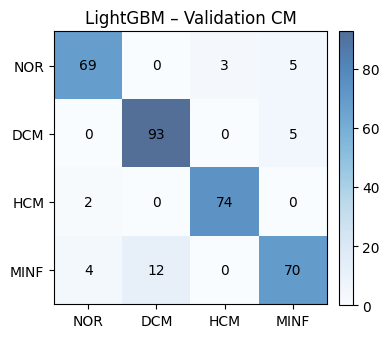


=== LightGBM – Test Report ===
              precision    recall  f1-score   support

         NOR      0.900     0.900     0.900        20
         DCM      0.889     0.800     0.842        20
         HCM      0.900     0.900     0.900        20
        MINF      0.818     0.900     0.857        20

    accuracy                          0.875        80
   macro avg      0.877     0.875     0.875        80
weighted avg      0.877     0.875     0.875        80



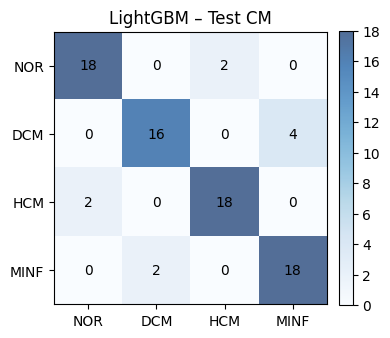


=== MLP – Validation Report ===
              precision    recall  f1-score   support

         NOR      0.911     0.935     0.923        77
         DCM      0.803     1.000     0.891        98
         HCM      0.944     0.882     0.912        76
        MINF      0.815     0.616     0.702        86

    accuracy                          0.861       337
   macro avg      0.868     0.858     0.857       337
weighted avg      0.863     0.861     0.855       337



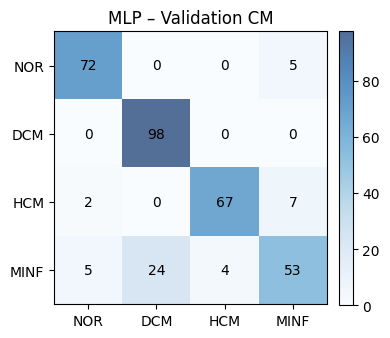


=== MLP – Test Report ===
              precision    recall  f1-score   support

         NOR      0.900     0.900     0.900        20
         DCM      0.818     0.900     0.857        20
         HCM      0.900     0.900     0.900        20
        MINF      0.889     0.800     0.842        20

    accuracy                          0.875        80
   macro avg      0.877     0.875     0.875        80
weighted avg      0.877     0.875     0.875        80



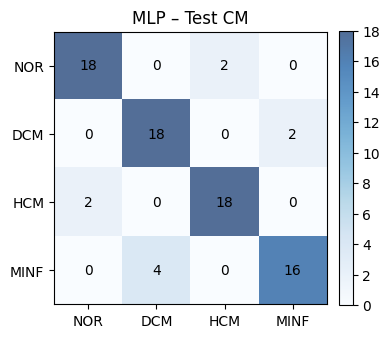


=== Stacking – Validation Report ===
              precision    recall  f1-score   support

         NOR      0.972     0.896     0.932        77
         DCM      0.891     1.000     0.942        98
         HCM      0.914     0.974     0.943        76
        MINF      0.933     0.814     0.870        86

    accuracy                          0.923       337
   macro avg      0.927     0.921     0.922       337
weighted avg      0.925     0.923     0.922       337



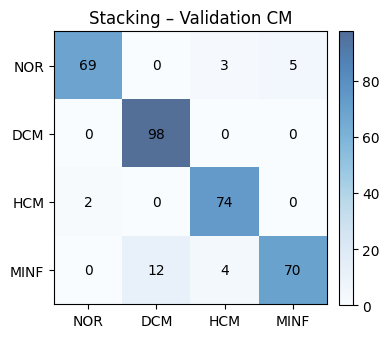


=== Stacking – Test Report ===
              precision    recall  f1-score   support

         NOR      1.000     0.900     0.947        20
         DCM      0.909     1.000     0.952        20
         HCM      0.909     1.000     0.952        20
        MINF      1.000     0.900     0.947        20

    accuracy                          0.950        80
   macro avg      0.955     0.950     0.950        80
weighted avg      0.955     0.950     0.950        80



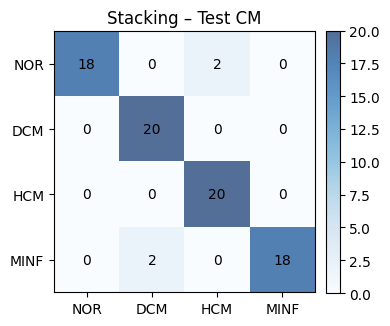

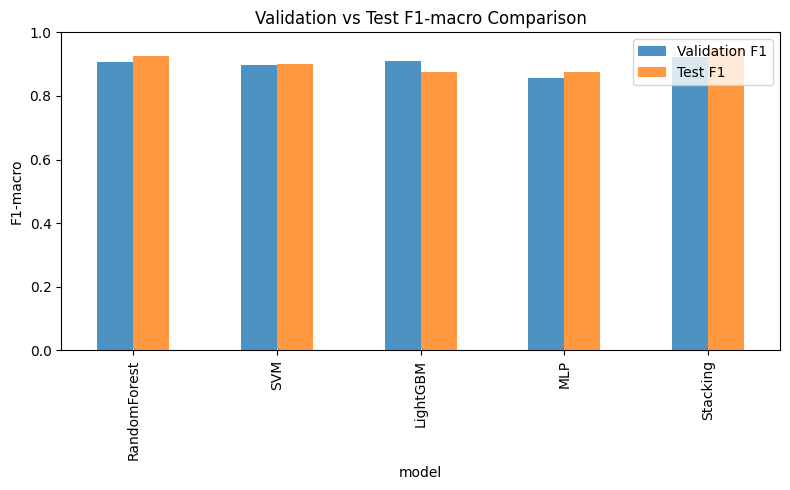


Saved best model (Stacking) to: /content/drive/MyDrive/ACDC dataset/Classification/modeling/final_multiclass_model.pkl


In [ ]:
# === 0. Mount Google Drive & set paths ===
from google.colab import drive
import os, warnings, logging, joblib
drive.mount('/content/drive', force_remount=True)
PREPROC_DIR     = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess'
FINAL_SAVE_PATH = '/content/drive/MyDrive/ACDC dataset/Classification/modeling/final_multiclass_model.pkl'

# suppress warnings and LightGBM logs
warnings.filterwarnings('ignore')
logging.getLogger('lightgbm').setLevel(logging.ERROR)

# === 1. Imports ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute        import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics       import (classification_report,
                                   confusion_matrix,
                                   accuracy_score, f1_score)
from sklearn.calibration   import CalibratedClassifierCV
from sklearn.ensemble      import RandomForestClassifier, StackingClassifier
from sklearn.svm           import SVC
from sklearn.linear_model  import LogisticRegression
from sklearn.neural_network import MLPClassifier
from lightgbm              import LGBMClassifier
from sklearn.model_selection import cross_validate

from imblearn.pipeline     import Pipeline
from imblearn.over_sampling import SMOTE

# === 2. Load & filter data ===
def load_and_filter(split):
    df = pd.read_csv(os.path.join(PREPROC_DIR,
        f'linked_{split}_cleaned_v111.csv'))
    return df[df['class_code'] != 1].reset_index(drop=True)

train, val, test = map(load_and_filter, ['train','val','test'])
FEATURES = [
    'nbframe','edv_ratio_diff','rv_edv_index_bsa',
    'rv_voxel_volume_ed','lv_ejection_fraction','lv_myo_ratio_ed'
]
X_tr, y_tr = train[FEATURES], train['class_code']
X_va, y_va = val[FEATURES],   val['class_code']
X_te, y_te = test[FEATURES],  test['class_code']

# === 3. Define & calibrate models ===
rf  = CalibratedClassifierCV(
    RandomForestClassifier(n_estimators=300, max_depth=20,
                           class_weight='balanced', random_state=42),
    cv=5, method='isotonic'
)
svm = CalibratedClassifierCV(
    SVC(kernel='rbf', C=2.0, gamma='scale',
        class_weight='balanced', probability=True, random_state=42),
    cv=5, method='sigmoid'
)
lgb = LGBMClassifier(learning_rate=0.03, num_leaves=31,
                     max_depth=5, random_state=42, verbose=-1)
mlp = MLPClassifier(hidden_layer_sizes=(64,32), alpha=5e-5,
                    learning_rate_init=0.005, early_stopping=True,
                    max_iter=1200, random_state=42)
stack = StackingClassifier(
    estimators=[('rf',rf),('svm',svm),('lgb',lgb),('mlp',mlp)],
    final_estimator=LogisticRegression(C=1.0,
                                       class_weight='balanced',
                                       max_iter=1000,
                                       random_state=42),
    cv=5, passthrough=True, n_jobs=-1
)

models = {
    'RandomForest': rf,
    'SVM':           svm,
    'LightGBM':      lgb,
    'MLP':           mlp,
    'Stacking':      stack
}

# === 4. Pipeline factory ===
def make_pipeline(model):
    return Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler',   StandardScaler()),
        ('smote',    SMOTE(random_state=42)),
        ('clf',      model)
    ])

labels = ['NOR','DCM','HCM','MINF']

# === 5. 5-Fold Cross-Validation on Training Set ===
print("=== 5-Fold CV Results on TRAINING SET ===")
for name, model in models.items():
    pipe = make_pipeline(model)
    cv_res = cross_validate(
        pipe, X_tr, y_tr,
        cv=5,
        scoring=['accuracy','f1_macro'],
        return_train_score=False
    )
    acc_mean = cv_res['test_accuracy'].mean()
    acc_std  = cv_res['test_accuracy'].std()
    f1_mean  = cv_res['test_f1_macro'].mean()
    f1_std   = cv_res['test_f1_macro'].std()
    print(f"{name}: Accuracy = {acc_mean:.3f} ± {acc_std:.3f}, "
          f"F1-macro = {f1_mean:.3f} ± {f1_std:.3f}")

# === 6. Train on Full Training Set & Evaluate on Validation/Test ===
compare = {'model':[], 'Validation F1':[], 'Test F1':[]}
pipes   = {}

for name, model in models.items():
    pipe = make_pipeline(model)
    pipe.fit(X_tr, y_tr)
    pipes[name] = pipe

    # Validation
    yv = pipe.predict(X_va)
    f1_v = f1_score(y_va, yv, average='macro')
    print(f"\n=== {name} – Validation Report ===")
    print(classification_report(y_va, yv, target_names=labels, digits=3))
    cm_v = confusion_matrix(y_va, yv)
    fig, ax = plt.subplots(figsize=(4,4))
    im = ax.imshow(cm_v, cmap='Blues', alpha=0.7)
    ax.set_title(f'{name} – Validation CM')
    ax.set_xticks(range(4)); ax.set_xticklabels(labels)
    ax.set_yticks(range(4)); ax.set_yticklabels(labels)
    for i in range(4):
        for j in range(4):
            ax.text(j, i, cm_v[i,j], ha='center', va='center', color='black')
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout(); plt.show()

    # Test
    yt = pipe.predict(X_te)
    f1_t = f1_score(y_te, yt, average='macro')
    print(f"\n=== {name} – Test Report ===")
    print(classification_report(y_te, yt, target_names=labels, digits=3))
    cm_t = confusion_matrix(y_te, yt)
    fig, ax = plt.subplots(figsize=(4,4))
    im = ax.imshow(cm_t, cmap='Blues', alpha=0.7)
    ax.set_title(f'{name} – Test CM')
    ax.set_xticks(range(4)); ax.set_xticklabels(labels)
    ax.set_yticks(range(4)); ax.set_yticklabels(labels)
    for i in range(4):
        for j in range(4):
            ax.text(j, i, cm_t[i,j], ha='center', va='center', color='black')
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout(); plt.show()

    compare['model'].append(name)
    compare['Validation F1'].append(f1_v)
    compare['Test F1'].append(f1_t)

# === 7. Comparison bar chart ===
df_cmp = pd.DataFrame(compare).set_index('model')
fig, ax = plt.subplots(figsize=(8,5))
df_cmp.plot.bar(ax=ax, alpha=0.8)
ax.set_ylim(0,1); ax.set_ylabel('F1-macro')
ax.set_title('Validation vs Test F1-macro Comparison')
ax.legend(title=''); plt.tight_layout(); plt.show()

# === 8. Save best model to Drive ===
best_idx  = compare['Test F1'].index(max(compare['Test F1']))
best_name = compare['model'][best_idx]
best_pipe = pipes[best_name]
joblib.dump(best_pipe, FINAL_SAVE_PATH)
print(f"\nSaved best model ({best_name}) to: {FINAL_SAVE_PATH}")


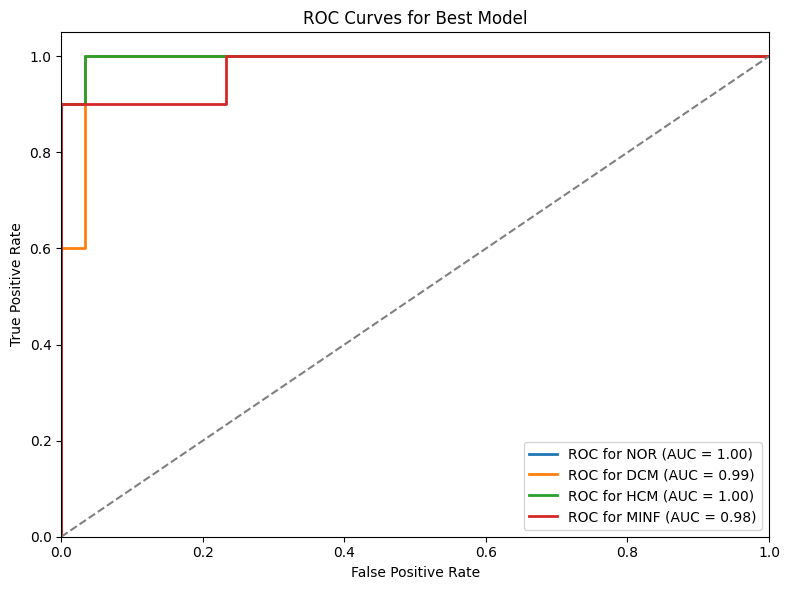

In [ ]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Load the trained best model from Drive
MODEL_PATH = '/content/drive/MyDrive/ACDC dataset/Classification/modeling/final_multiclass_model.pkl'
best_pipe = joblib.load(MODEL_PATH)

# Load and prepare the test set
PREPROC_DIR = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess'
df_test = pd.read_csv(os.path.join(PREPROC_DIR, 'linked_test_cleaned_v111.csv'))
df_test = df_test[df_test['class_code'] != 1].reset_index(drop=True)

FEATURES = [
    'nbframe','edv_ratio_diff','rv_edv_index_bsa',
    'rv_voxel_volume_ed','lv_ejection_fraction','lv_myo_ratio_ed'
]
labels = ['NOR','DCM','HCM','MINF']

X_te = df_test[FEATURES]
y_te = df_test['class_code']

# Binarize the true labels for multi-class ROC computation
classes = np.unique(y_te)
y_test_bin = label_binarize(y_te, classes=classes)

# Get the predicted probabilities for each class
y_score = best_pipe.predict_proba(X_te)

# Compute ROC curve and AUC for each class
n_classes = y_test_bin.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    # false positive rate, true positive rate, thresholds
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    # area under the curve for this class
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], linewidth=2,
             label=f'ROC for {labels[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Best Model')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


Mounted at /content/drive
=== 5-Fold CV Results on TRAINING SET ===
RandomForest: Accuracy = 1.000 ± 0.000, F1-macro = 1.000 ± 0.000
SVM: Accuracy = 0.988 ± 0.007, F1-macro = 0.987 ± 0.008
LightGBM: Accuracy = 1.000 ± 0.000, F1-macro = 1.000 ± 0.000
MLP: Accuracy = 0.999 ± 0.003, F1-macro = 0.998 ± 0.003
Stacking: Accuracy = 1.000 ± 0.000, F1-macro = 1.000 ± 0.000

=== RandomForest – Validation Report ===
              precision    recall  f1-score   support

         NOR      0.920     0.896     0.908        77
         DCM      0.885     0.939     0.911        98
         HCM      0.961     0.974     0.967        76
        MINF      0.864     0.814     0.838        86

    accuracy                          0.905       337
   macro avg      0.907     0.906     0.906       337
weighted avg      0.905     0.905     0.904       337



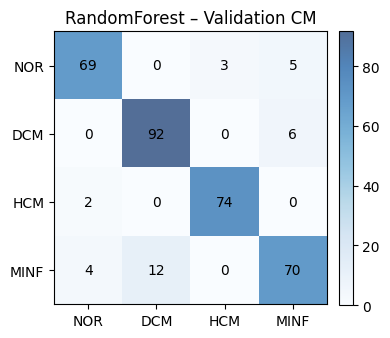


=== RandomForest – Test Report ===
              precision    recall  f1-score   support

         NOR      0.900     0.900     0.900        20
         DCM      0.909     1.000     0.952        20
         HCM      0.900     0.900     0.900        20
        MINF      1.000     0.900     0.947        20

    accuracy                          0.925        80
   macro avg      0.927     0.925     0.925        80
weighted avg      0.927     0.925     0.925        80



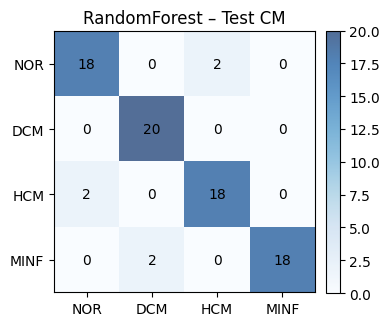


=== SVM – Validation Report ===
              precision    recall  f1-score   support

         NOR      0.856     1.000     0.922        77
         DCM      0.852     1.000     0.920        98
         HCM      0.944     0.882     0.912        76
        MINF      1.000     0.709     0.830        86

    accuracy                          0.899       337
   macro avg      0.913     0.898     0.896       337
weighted avg      0.911     0.899     0.896       337



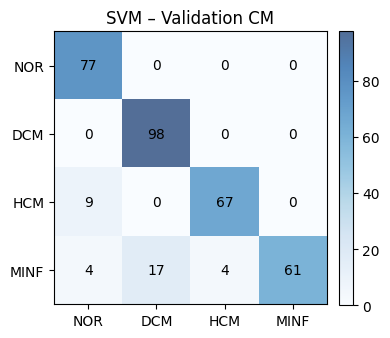


=== SVM – Test Report ===
              precision    recall  f1-score   support

         NOR      0.909     1.000     0.952        20
         DCM      0.818     0.900     0.857        20
         HCM      1.000     0.900     0.947        20
        MINF      0.889     0.800     0.842        20

    accuracy                          0.900        80
   macro avg      0.904     0.900     0.900        80
weighted avg      0.904     0.900     0.900        80



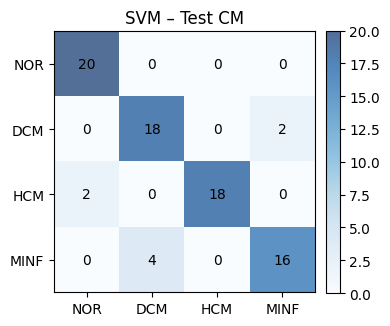


=== LightGBM – Validation Report ===
              precision    recall  f1-score   support

         NOR      0.920     0.896     0.908        77
         DCM      0.886     0.949     0.916        98
         HCM      0.961     0.974     0.967        76
        MINF      0.875     0.814     0.843        86

    accuracy                          0.908       337
   macro avg      0.910     0.908     0.909       337
weighted avg      0.908     0.908     0.907       337



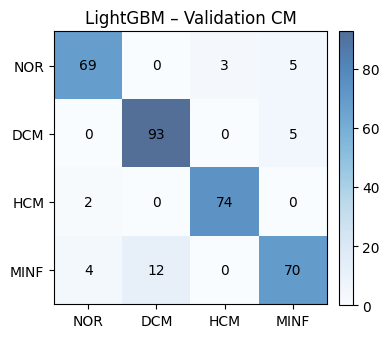


=== LightGBM – Test Report ===
              precision    recall  f1-score   support

         NOR      0.900     0.900     0.900        20
         DCM      0.889     0.800     0.842        20
         HCM      0.900     0.900     0.900        20
        MINF      0.818     0.900     0.857        20

    accuracy                          0.875        80
   macro avg      0.877     0.875     0.875        80
weighted avg      0.877     0.875     0.875        80



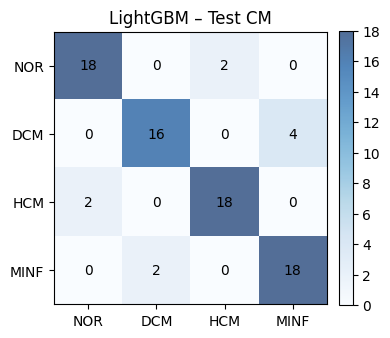


=== MLP – Validation Report ===
              precision    recall  f1-score   support

         NOR      0.911     0.935     0.923        77
         DCM      0.803     1.000     0.891        98
         HCM      0.944     0.882     0.912        76
        MINF      0.815     0.616     0.702        86

    accuracy                          0.861       337
   macro avg      0.868     0.858     0.857       337
weighted avg      0.863     0.861     0.855       337



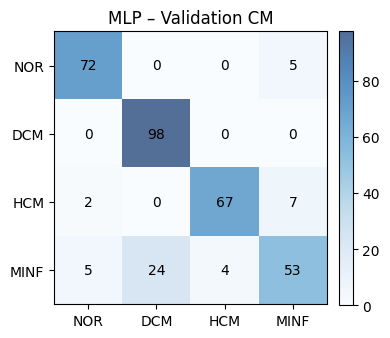


=== MLP – Test Report ===
              precision    recall  f1-score   support

         NOR      0.900     0.900     0.900        20
         DCM      0.818     0.900     0.857        20
         HCM      0.900     0.900     0.900        20
        MINF      0.889     0.800     0.842        20

    accuracy                          0.875        80
   macro avg      0.877     0.875     0.875        80
weighted avg      0.877     0.875     0.875        80



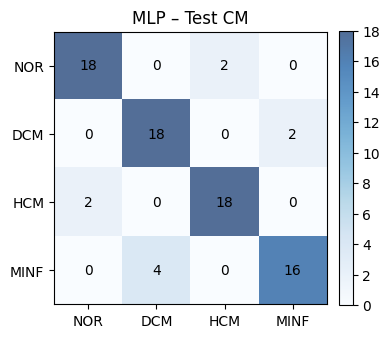


=== Stacking – Validation Report ===
              precision    recall  f1-score   support

         NOR      0.972     0.896     0.932        77
         DCM      0.891     1.000     0.942        98
         HCM      0.914     0.974     0.943        76
        MINF      0.933     0.814     0.870        86

    accuracy                          0.923       337
   macro avg      0.927     0.921     0.922       337
weighted avg      0.925     0.923     0.922       337



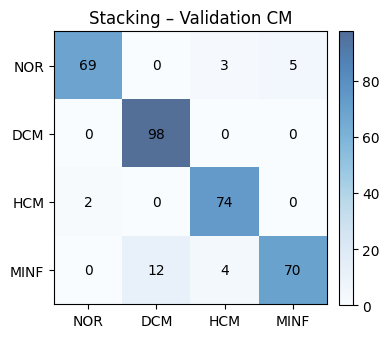


=== Stacking – Test Report ===
              precision    recall  f1-score   support

         NOR      1.000     0.900     0.947        20
         DCM      0.909     1.000     0.952        20
         HCM      0.909     1.000     0.952        20
        MINF      1.000     0.900     0.947        20

    accuracy                          0.950        80
   macro avg      0.955     0.950     0.950        80
weighted avg      0.955     0.950     0.950        80



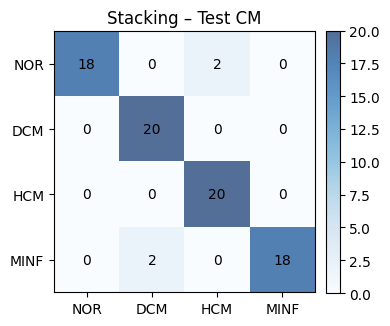

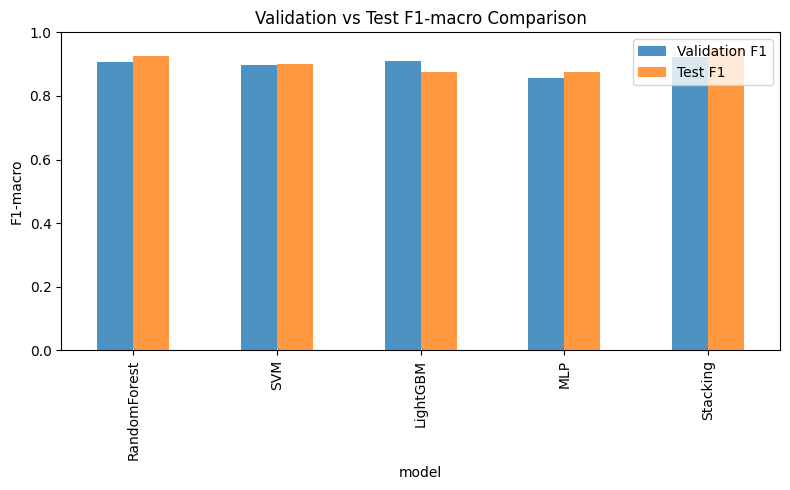


Saved best model (Stacking) to: /content/drive/MyDrive/ACDC dataset/Classification/modeling/final_multiclass_model.pkl


In [ ]:
# === 0. Mount Google Drive & set paths ===
from google.colab import drive
import os, warnings, logging, joblib
drive.mount('/content/drive', force_remount=True)
PREPROC_DIR     = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess'
FINAL_SAVE_PATH = '/content/drive/MyDrive/ACDC dataset/Classification/modeling/final_multiclass_model.pkl'

# suppress warnings and LightGBM logs
warnings.filterwarnings('ignore')
logging.getLogger('lightgbm').setLevel(logging.ERROR)

# === 1. Imports ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute        import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics       import (classification_report,
                                   confusion_matrix,
                                   accuracy_score, f1_score)
from sklearn.calibration   import CalibratedClassifierCV
from sklearn.ensemble      import RandomForestClassifier, StackingClassifier
from sklearn.svm           import SVC
from sklearn.linear_model  import LogisticRegression
from sklearn.neural_network import MLPClassifier
from lightgbm              import LGBMClassifier
from sklearn.model_selection import cross_validate

from imblearn.pipeline     import Pipeline
from imblearn.over_sampling import SMOTE

# === 2. Load & filter data ===
def load_and_filter(split):
    df = pd.read_csv(os.path.join(PREPROC_DIR,
        f'linked_{split}_cleaned_v111.csv'))
    return df[df['class_code'] != 1].reset_index(drop=True)

train, val, test = map(load_and_filter, ['train','val','test'])
FEATURES = [
    'nbframe','edv_ratio_diff','rv_edv_index_bsa',
    'rv_voxel_volume_ed','lv_ejection_fraction','lv_myo_ratio_ed'
]
X_tr, y_tr = train[FEATURES], train['class_code']
X_va, y_va = val[FEATURES],   val['class_code']
X_te, y_te = test[FEATURES],  test['class_code']

# === 3. Define & calibrate models ===
rf  = CalibratedClassifierCV(
    RandomForestClassifier(n_estimators=300, max_depth=20,
                           class_weight='balanced', random_state=42),
    cv=5, method='isotonic'
)
svm = CalibratedClassifierCV(
    SVC(kernel='rbf', C=2.0, gamma='scale',
        class_weight='balanced', probability=True, random_state=42),
    cv=5, method='sigmoid'
)
lgb = LGBMClassifier(learning_rate=0.03, num_leaves=31,
                     max_depth=5, random_state=42, verbose=-1)
mlp = MLPClassifier(hidden_layer_sizes=(64,32), alpha=5e-5,
                    learning_rate_init=0.005, early_stopping=True,
                    max_iter=1200, random_state=42)
stack = StackingClassifier(
    estimators=[('rf',rf),('svm',svm),('lgb',lgb),('mlp',mlp)],
    final_estimator=LogisticRegression(C=1.0,
                                       class_weight='balanced',
                                       max_iter=1000,
                                       random_state=42),
    cv=5, passthrough=True, n_jobs=-1
)

models = {
    'RandomForest': rf,
    'SVM':           svm,
    'LightGBM':      lgb,
    'MLP':           mlp,
    'Stacking':      stack
}

# === 4. Pipeline factory ===
def make_pipeline(model):
    return Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler',   StandardScaler()),
        ('smote',    SMOTE(random_state=42)),
        ('clf',      model)
    ])

labels = ['NOR','DCM','HCM','MINF']

# === 5. 5-Fold Cross-Validation on Training Set ===
print("=== 5-Fold CV Results on TRAINING SET ===")
for name, model in models.items():
    pipe = make_pipeline(model)
    cv_res = cross_validate(
        pipe, X_tr, y_tr,
        cv=5,
        scoring=['accuracy','f1_macro'],
        return_train_score=False
    )
    acc_mean = cv_res['test_accuracy'].mean()
    acc_std  = cv_res['test_accuracy'].std()
    f1_mean  = cv_res['test_f1_macro'].mean()
    f1_std   = cv_res['test_f1_macro'].std()
    print(f"{name}: Accuracy = {acc_mean:.3f} ± {acc_std:.3f}, "
          f"F1-macro = {f1_mean:.3f} ± {f1_std:.3f}")

# === 6. Train on Full Training Set & Evaluate on Validation/Test ===
compare = {'model':[], 'Validation F1':[], 'Test F1':[]}
pipes   = {}

for name, model in models.items():
    pipe = make_pipeline(model)
    pipe.fit(X_tr, y_tr)
    pipes[name] = pipe

    # Validation
    yv = pipe.predict(X_va)
    f1_v = f1_score(y_va, yv, average='macro')
    print(f"\n=== {name} – Validation Report ===")
    print(classification_report(y_va, yv, target_names=labels, digits=3))
    cm_v = confusion_matrix(y_va, yv)
    fig, ax = plt.subplots(figsize=(4,4))
    im = ax.imshow(cm_v, cmap='Blues', alpha=0.7)
    ax.set_title(f'{name} – Validation CM')
    ax.set_xticks(range(4)); ax.set_xticklabels(labels)
    ax.set_yticks(range(4)); ax.set_yticklabels(labels)
    for i in range(4):
        for j in range(4):
            ax.text(j, i, cm_v[i,j], ha='center', va='center', color='black')
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout(); plt.show()

    # Test
    yt = pipe.predict(X_te)
    f1_t = f1_score(y_te, yt, average='macro')
    print(f"\n=== {name} – Test Report ===")
    print(classification_report(y_te, yt, target_names=labels, digits=3))
    cm_t = confusion_matrix(y_te, yt)
    fig, ax = plt.subplots(figsize=(4,4))
    im = ax.imshow(cm_t, cmap='Blues', alpha=0.7)
    ax.set_title(f'{name} – Test CM')
    ax.set_xticks(range(4)); ax.set_xticklabels(labels)
    ax.set_yticks(range(4)); ax.set_yticklabels(labels)
    for i in range(4):
        for j in range(4):
            ax.text(j, i, cm_t[i,j], ha='center', va='center', color='black')
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout(); plt.show()

    compare['model'].append(name)
    compare['Validation F1'].append(f1_v)
    compare['Test F1'].append(f1_t)

# === 7. Comparison bar chart ===
df_cmp = pd.DataFrame(compare).set_index('model')
fig, ax = plt.subplots(figsize=(8,5))
df_cmp.plot.bar(ax=ax, alpha=0.8)
ax.set_ylim(0,1); ax.set_ylabel('F1-macro')
ax.set_title('Validation vs Test F1-macro Comparison')
ax.legend(title=''); plt.tight_layout(); plt.show()

# === 8. Save best model to Drive ===
best_idx  = compare['Test F1'].index(max(compare['Test F1']))
best_name = compare['model'][best_idx]
best_pipe = pipes[best_name]
joblib.dump(best_pipe, FINAL_SAVE_PATH)
print(f"\nSaved best model ({best_name}) to: {FINAL_SAVE_PATH}")


In [ ]:
import matplotlib.pyplot as plt
import os

# === Create Figures Directory in Drive if not exists ===
FIGURES_DIR = '/content/drive/MyDrive/figures'
os.makedirs(FIGURES_DIR, exist_ok=True)

# === Save Stacking Model Confusion Matrix (Test) ===
stack_cm = confusion_matrix(y_te, pipes['Stacking'].predict(X_te))
fig, ax = plt.subplots(figsize=(4, 4))
im = ax.imshow(stack_cm, cmap='Blues', alpha=0.7)
ax.set_title('Stacking – Test Confusion Matrix')
ax.set_xticks(range(4)); ax.set_xticklabels(labels)
ax.set_yticks(range(4)); ax.set_yticklabels(labels)

for i in range(4):
    for j in range(4):
        ax.text(j, i, stack_cm[i, j], ha='center', va='center', color='black')

plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()

# Save with high dpi
stack_cm_path = os.path.join(FIGURES_DIR, 'stacking_test_confusion_matrix.jpg')
fig.savefig(stack_cm_path, dpi=600, format='jpg')
plt.close(fig)  # close to avoid duplicate display

# === Save Validation vs Test F1-Macro Comparison ===
df_cmp = pd.DataFrame(compare).set_index('model')
fig, ax = plt.subplots(figsize=(8, 5))
df_cmp.plot.bar(ax=ax, alpha=0.8)
ax.set_ylim(0, 1)
ax.set_ylabel('F1-macro')
ax.set_title('Validation vs Test F1-macro Comparison')
ax.legend(title='')

plt.tight_layout()
bar_chart_path = os.path.join(FIGURES_DIR, 'validation_vs_test_f1_comparison.jpg')
fig.savefig(bar_chart_path, dpi=600, format='jpg')
plt.close(fig)

print(f"✅ Saved Stacking confusion matrix to: {stack_cm_path}")
print(f"✅ Saved F1-score comparison chart to: {bar_chart_path}")






✅ Saved Stacking confusion matrix to: /content/drive/MyDrive/figures/stacking_test_confusion_matrix.jpg
✅ Saved F1-score comparison chart to: /content/drive/MyDrive/figures/validation_vs_test_f1_comparison.jpg


In [ ]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# === Define paths ===
MODEL_PATH = '/content/drive/MyDrive/ACDC dataset/Classification/modeling/final_multiclass_model.pkl'
PREPROC_DIR = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess'
FIGURE_DIR = '/content/drive/MyDrive/figures'
os.makedirs(FIGURE_DIR, exist_ok=True)

# === Load trained best model ===
best_pipe = joblib.load(MODEL_PATH)

# === Load and prepare the test set ===
df_test = pd.read_csv(os.path.join(PREPROC_DIR, 'linked_test_cleaned_v111.csv'))
df_test = df_test[df_test['class_code'] != 1].reset_index(drop=True)

FEATURES = [
    'nbframe', 'edv_ratio_diff', 'rv_edv_index_bsa',
    'rv_voxel_volume_ed', 'lv_ejection_fraction', 'lv_myo_ratio_ed'
]
labels = ['NOR', 'DCM', 'HCM', 'MINF']

X_te = df_test[FEATURES]
y_te = df_test['class_code']

# === Binarize labels and predict probabilities ===
classes = np.unique(y_te)
y_test_bin = label_binarize(y_te, classes=classes)
y_score = best_pipe.predict_proba(X_te)

# === Compute ROC curve and AUC for each class ===
fpr, tpr, roc_auc = {}, {}, {}
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# === Plot and save the ROC curve figure ===
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], linewidth=2,
             label=f'ROC for {labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Best Model')
plt.legend(loc='lower right')
plt.tight_layout()

# Save figure as high-res JPG
roc_fig_path = os.path.join(FIGURE_DIR, 'roc_curves_best_model.jpg')
plt.savefig(roc_fig_path, dpi=600, format='jpg')
plt.close()

print(f"✅ ROC curves saved to: {roc_fig_path}")

✅ ROC curves saved to: /content/drive/MyDrive/figures/roc_curves_best_model.jpg


# ***Hierarchical Inference Pipeline: Ventricular Localization → Disease Classification"***

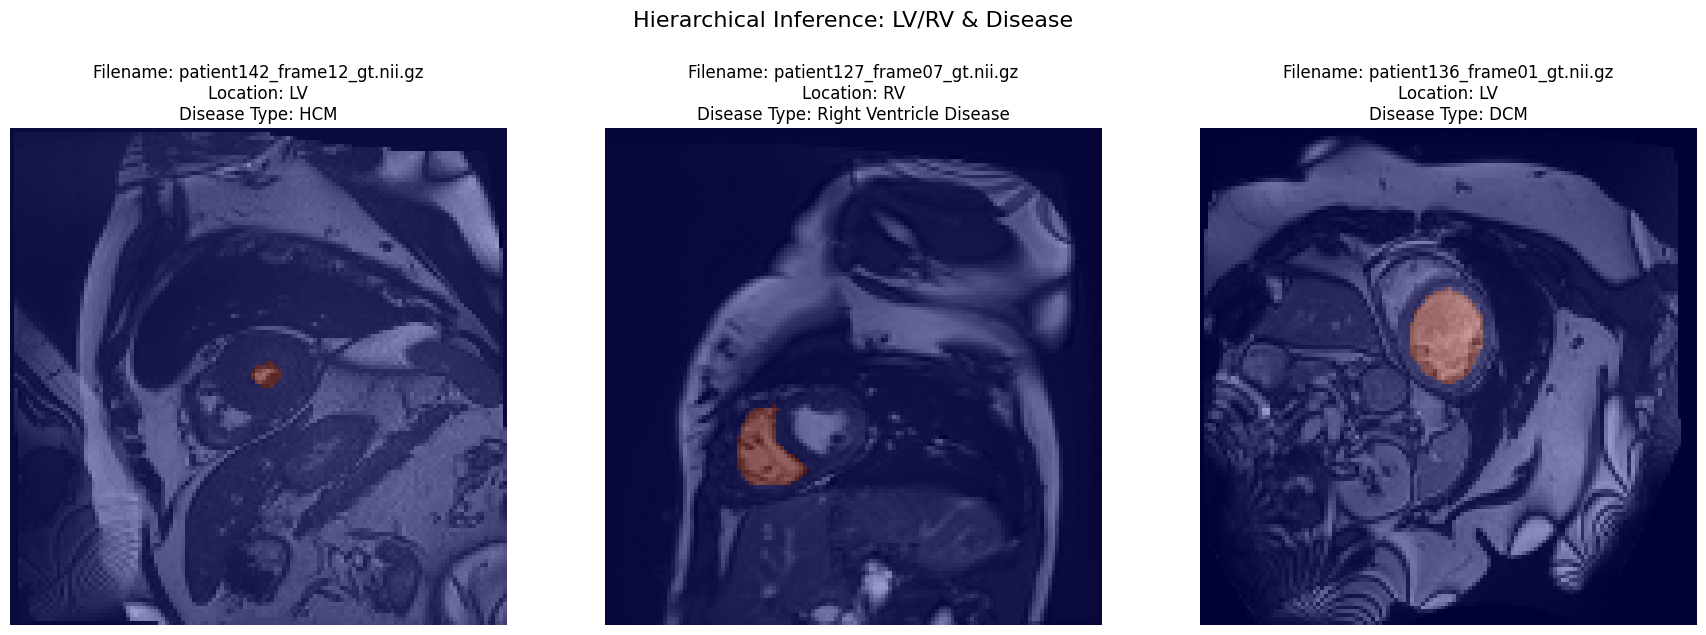

In [ ]:
plt.figure(figsize=(18, 6))
for i, (_, row) in enumerate(sample_rows.iterrows()):
    fn = row["filename"]

    # 5.1. Binary predict: 0=LV, 1=RV
    X_loc = row[loc_features].astype(float).values.reshape(1, -1)
    loc_pred = pipe_loc.predict(X_loc)[0]

    if loc_pred == 1:
        diagnosis, pred_label, loc_str = "Right Ventricle Disease", 1, "RV"
    else:
        # 5.2. Multiclass on LV
        X_cls = row[class_features].astype(float).values.reshape(1, -1)
        cls_pred = pipe_clsf.predict(X_cls)[0]
        diagnosis, pred_label, loc_str = (
            label_map.get(cls_pred, "Unknown"),
            3,
            "LV"
        )

    # 5.3. Load image + mask & overlay
    img_path = os.path.join(IMAGE_DIR, fn.replace("_gt", ""))
    msk_path = os.path.join(MASK_DIR, fn)
    if not (os.path.exists(img_path) and os.path.exists(msk_path)):
        print(f"Missing files for {fn}")
        continue

    img  = nib.load(img_path).get_fdata()
    msk  = nib.load(msk_path).get_fdata()
    slc  = img.shape[0] // 2

    ax = plt.subplot(1, num_samples, i+1)
    ax.imshow(img[slc], cmap="gray")
    ax.imshow((msk[slc] == pred_label).astype(float), cmap="jet", alpha=0.4)

    # ← Updated title formatting:
    ax.set_title(
        f"Filename: {fn}\n"
        f"Location: {loc_str}\n"
        f"Disease Type: {diagnosis}",
        fontsize=12,
        loc='center'
    )
    ax.axis("off")

plt.suptitle("Hierarchical Inference: LV/RV & Disease", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(18, 6))
for i, (_, row) in enumerate(sample_rows.iterrows()):
    fn = row["filename"]

    # 5.1. Binary predict: 0=LV, 1=RV
    X_loc = row[loc_features].astype(float).values.reshape(1, -1)
    loc_pred = pipe_loc.predict(X_loc)[0]

    if loc_pred == 1:
        diagnosis, pred_label, loc_str = "Right Ventricle Disease", 1, "RV"
    else:
        # 5.2. Multiclass on LV
        X_cls = row[class_features].astype(float).values.reshape(1, -1)
        cls_pred = pipe_clsf.predict(X_cls)[0]
        diagnosis, pred_label, loc_str = (
            label_map.get(cls_pred, "Unknown"),
            3,
            "LV"
        )

    # 5.3. Load image + mask & overlay
    img_path = os.path.join(IMAGE_DIR, fn.replace("_gt", ""))
    msk_path = os.path.join(MASK_DIR, fn)
    if not (os.path.exists(img_path) and os.path.exists(msk_path)):
        print(f"Missing files for {fn}")
        continue

    img  = nib.load(img_path).get_fdata()
    msk  = nib.load(msk_path).get_fdata()
    slc  = img.shape[0] // 2

    ax = plt.subplot(1, num_samples, i+1)
    ax.imshow(img[slc], cmap="gray")
    ax.imshow((msk[slc] == pred_label).astype(float), cmap="jet", alpha=0.4)

    # ← Updated title formatting:
    ax.set_title(
        f"Filename: {fn}\n"
        f"Location: {loc_str}\n"
        f"Disease Type: {diagnosis}",
        fontsize=12,
        loc='center'
    )
    ax.axis("off")

plt.suptitle("Hierarchical Inference: LV/RV & Disease", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


ValueError: X has 7 features, but SimpleImputer is expecting 6 features as input.

<Figure size 1800x600 with 0 Axes>

In [ ]:
# 1) استخدم أسماء الميزات التي تدرّب عليها النموذج (Sklearn ≥ 1.0)
expected_loc  = list(getattr(pipe_loc,  "feature_names_in_", []))
expected_cls  = list(getattr(pipe_clsf, "feature_names_in_", []))

# لو الخاصية غير متوفرة (نسخة قديمة)، خزّن/حمّل القائمة التي درّبت بها النموذج
# expected_loc = saved_loc_feature_names
# expected_cls = saved_cls_feature_names

# 2) حضّر صفّ الإدخال بالضبط بنفس الأعمدة والترتيب
row_df = pd.DataFrame([row])

X_loc = row_df.reindex(columns=expected_loc).astype(float).to_numpy()
X_cls = row_df.reindex(columns=expected_cls).astype(float).to_numpy()

# 3) التنبؤ
loc_pred = pipe_loc.predict(X_loc)[0]
if loc_pred == 1:
    diagnosis, pred_label, loc_str = "Right Ventricle Disease", 1, "RV"
else:
    cls_pred = pipe_clsf.predict(X_cls)[0]
    diagnosis, pred_label, loc_str = (label_map.get(cls_pred, "Unknown"), 3, "LV")


In [ ]:
print("len(loc_features) now:", len(loc_features), loc_features)
print("pipe_loc expects:", getattr(pipe_loc, "n_features_in_", None))
print("pipe_loc feature_names_in_:", getattr(pipe_loc, "feature_names_in_", None))


len(loc_features) now: 7 ['lv_myo_ratio_es', 'lv_edv_index_bsa', 'lv_mass_index_es', 'lv_mass_es', 'height', 'lv_contraction_ratio', 'weight']
pipe_loc expects: 6
pipe_loc feature_names_in_: ['lv_myo_ratio_es' 'lv_edv_index_bsa' 'lv_mass_index_es' 'height'
 'lv_contraction_ratio' 'weight']


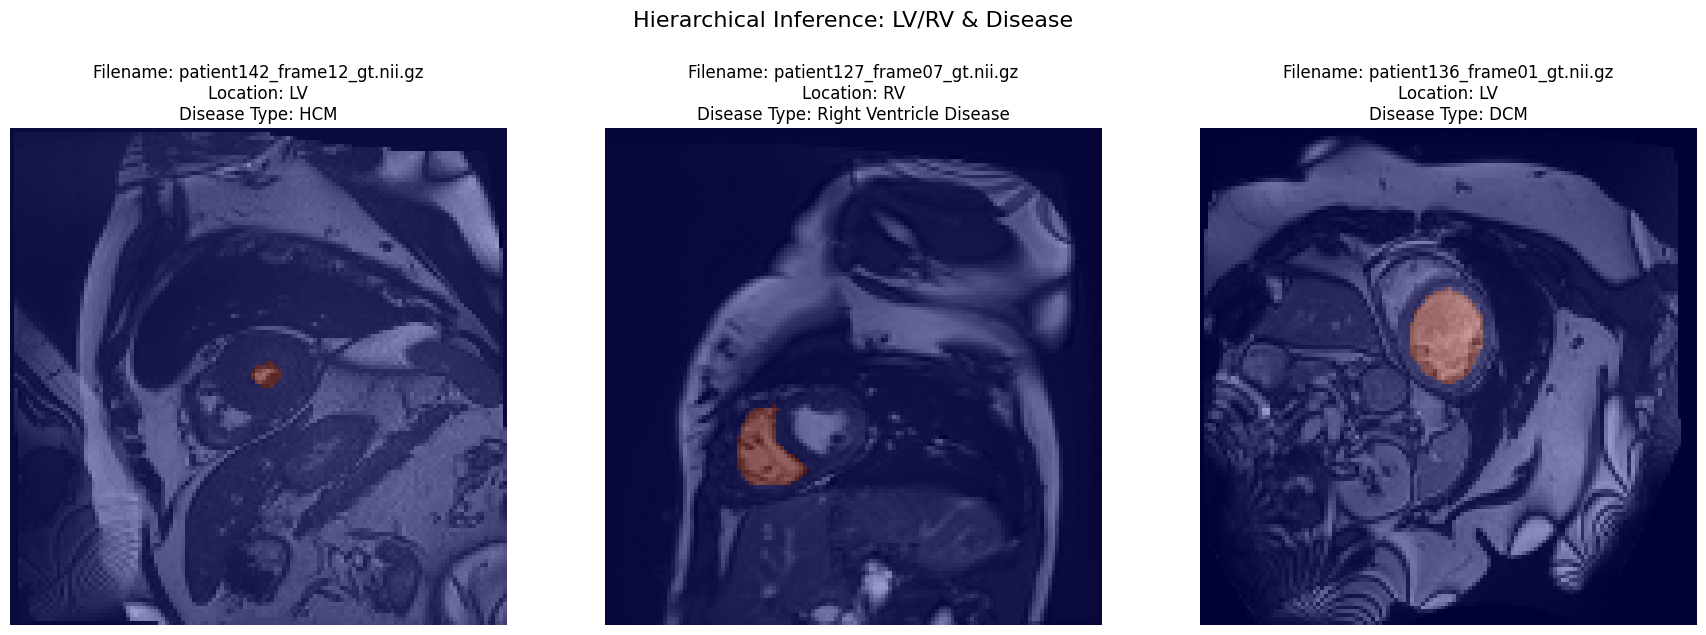

In [ ]:
# --- Safe feature alignment from trained models ---
# For scikit-learn ≥ 1.0, models store the training feature names here:
expected_loc = list(getattr(pipe_loc,  "feature_names_in_", []))
expected_cls = list(getattr(pipe_clsf, "feature_names_in_", []))

if not expected_loc:
    raise RuntimeError("pipe_loc is missing feature_names_in_. Retrain or provide saved feature list.")
if not expected_cls:
    raise RuntimeError("pipe_clsf is missing feature_names_in_. Retrain or provide saved feature list.")

# (Optional) map from LV classifier numeric labels to disease names
# Example: label_map = {0: "NOR", 1: "MINF", 2: "DCM", 3: "HCM"}
assert 'label_map' in globals(), "Please define label_map = {..} for your LV classes."

# --- Plot hierarchical predictions ---
plt.figure(figsize=(18, 6))
num_samples = len(sample_rows)

for i, (_, row) in enumerate(sample_rows.iterrows()):
    fn = row["filename"]

    # 1) Build a DataFrame row and align columns EXACTLY as trained
    row_df = pd.DataFrame([row])

    # 2) Location binary model (0=LV, 1=RV)
    X_loc = row_df.reindex(columns=expected_loc).astype(float).to_numpy()
    loc_pred = pipe_loc.predict(X_loc)[0]

    if loc_pred == 1:
        diagnosis = "Right Ventricle Disease"
        pred_label = 1  # assuming mask label 1 corresponds to RV
        loc_str = "RV"
        # NOTE: If your mask labels differ, adjust pred_label accordingly.
    else:
        # 3) LV multiclass classifier
        X_cls = row_df.reindex(columns=expected_cls).astype(float).to_numpy()
        cls_pred = pipe_clsf.predict(X_cls)[0]
        diagnosis = label_map.get(cls_pred, "Unknown")
        pred_label = 3  # assuming mask label 3 corresponds to LV
        loc_str = "LV"

    # 4) Load image and mask
    img_path = os.path.join(IMAGE_DIR, fn.replace("_gt", ""))
    msk_path = os.path.join(MASK_DIR, fn)
    if not (os.path.exists(img_path) and os.path.exists(msk_path)):
        print(f"Missing files for {fn}")
        continue

    img = nib.load(img_path).get_fdata()
    msk = nib.load(msk_path).get_fdata()

    # Take mid-slice along the first axis (adjust if your data is oriented differently)
    slc = img.shape[0] // 2

    # 5) Plot overlay
    ax = plt.subplot(1, num_samples, i + 1)
    ax.imshow(img[slc], cmap="gray")
    ax.imshow((msk[slc] == pred_label).astype(float), cmap="jet", alpha=0.4)

    ax.set_title(
        f"Filename: {fn}\n"
        f"Location: {loc_str}\n"
        f"Disease Type: {diagnosis}",
        fontsize=12,
        loc="center"
    )
    ax.axis("off")

plt.suptitle("Hierarchical Inference: LV/RV & Disease", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


Selected 5 TEST samples.


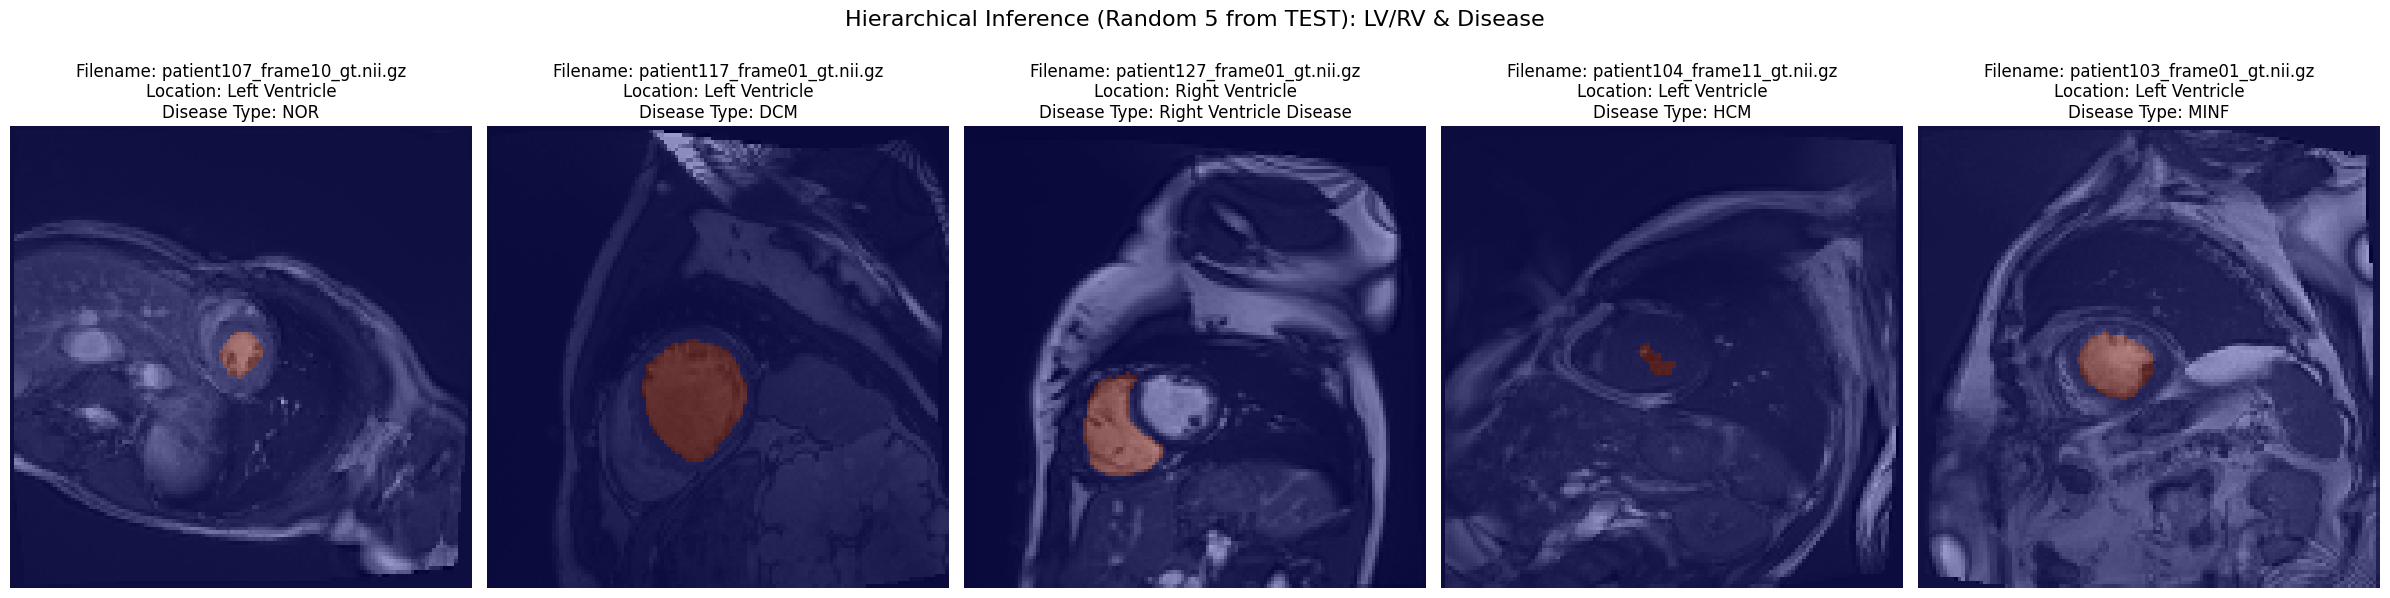

In [ ]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib

# ========= Paths (TEST folders) =========
PREPROC_DIR = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess'
IMAGE_DIR   = '/content/drive/MyDrive/ACDC dataset/testing/Normalized_Resampled_Images'
MASK_DIR    = '/content/drive/MyDrive/ACDC dataset/Classification/preprocess/Feature_Extraction_Test'

# Saved models from your latest training
LOC_MODEL_PATH   = '/content/drive/MyDrive/ACDC dataset/Classification/modeling/final_binary_model.pkl'
CLASS_MODEL_PATH = '/content/drive/MyDrive/ACDC dataset/Classification/modeling/final_multiclass_model.pkl'

# Mask label codes (adjust if your masks use different codes)
LV_LABEL = 3
RV_LABEL = 1

# Label map for LV multiclass (based on your training that excluded code 1)
label_map = {0: 'NOR', 2: 'DCM', 3: 'HCM', 4: 'MINF'}

# ========= 1) Load TEST DataFrames =========
# نستخدم نسخة v111 لأن تدريباتك الأخيرة كانت عليها
df_test = pd.read_csv(os.path.join(PREPROC_DIR, 'linked_test_cleaned_v111.csv'))

# لو تحتاجي DF منفصل للمولتي-كلاس (نفس الملف هنا كافي لأنه يحتوي الميزات)
df_cls_test = df_test.copy().set_index('filename', drop=False)

# ========= 2) Load trained pipelines & pull their training feature lists =========
pipe_loc  = joblib.load(LOC_MODEL_PATH)     # binary LV/RV pipeline (imputer+scaler+smote+clf)
pipe_clsf = joblib.load(CLASS_MODEL_PATH)   # LV multiclass pipeline

expected_loc = list(getattr(pipe_loc,  'feature_names_in_', []))
expected_cls = list(getattr(pipe_clsf, 'feature_names_in_', []))
if not expected_loc:
    raise RuntimeError("pipe_loc has no feature_names_in_. Please retrain or save the training feature list.")
if not expected_cls:
    raise RuntimeError("pipe_clsf has no feature_names_in_. Please retrain or save the training feature list.")

# ========= 3) Keep only test rows that actually exist on disk (image+mask) =========
def list_mask_filenames(mask_dir):
    if not os.path.isdir(mask_dir):
        return set()
    return {fn for fn in os.listdir(mask_dir) if fn.endswith('.nii') or fn.endswith('.nii.gz')}

test_mask_names = list_mask_filenames(MASK_DIR)

df_test_paths = df_test[df_test['filename'].isin(test_mask_names)].copy()
def mk_paths(fn):
    return (
        os.path.join(IMAGE_DIR, fn.replace('_gt', '')),
        os.path.join(MASK_DIR,  fn),
    )

df_test_paths['img_path'], df_test_paths['msk_path'] = zip(*df_test_paths['filename'].map(mk_paths))
valid_rows = df_test_paths[
    df_test_paths.apply(lambda r: os.path.exists(r['img_path']) and os.path.exists(r['msk_path']), axis=1)
]

# ========= 4) Sample 5 random TEST cases (or fewer if not enough) =========
sample_n = min(5, len(valid_rows))
if sample_n == 0:
    raise RuntimeError("No valid TEST samples with existing image+mask. Check IMAGE_DIR/MASK_DIR & filenames.")
sample_rows = valid_rows.sample(n=sample_n, random_state=None)
print(f"Selected {sample_n} TEST samples.")

# ========= 5) Run hierarchical inference & visualize =========
plt.figure(figsize=(4.4 * sample_n + 2, 6))

for i, (_, row) in enumerate(sample_rows.iterrows()):
    fn       = row['filename']
    img_path = row['img_path']
    msk_path = row['msk_path']

    # --- Binary location (0=LV, 1=RV) using the exact training features/order
    row_df_loc = pd.DataFrame([row])
    X_loc = row_df_loc.reindex(columns=expected_loc).astype(float).to_numpy()
    loc_pred = pipe_loc.predict(X_loc)[0]

    if loc_pred == 1:
        diagnosis  = 'Right Ventricle Disease'
        pred_label = RV_LABEL
        loc_str    = 'Right Ventricle'
    else:
        # --- LV multiclass branch
        if fn not in df_cls_test.index:
            print(f"No LV multiclass row for: {fn}")
            continue
        row_cls = df_cls_test.loc[fn]
        row_df_cls = pd.DataFrame([row_cls])
        X_cls = row_df_cls.reindex(columns=expected_cls).astype(float).to_numpy()

        cls_pred  = pipe_clsf.predict(X_cls)[0]
        diagnosis = label_map.get(int(cls_pred), 'Unknown')
        pred_label = LV_LABEL
        loc_str    = 'Left Ventricle'

    # --- Load volumes & plot mid-slice
    img = nib.load(img_path).get_fdata()
    msk = nib.load(msk_path).get_fdata()
    slc = img.shape[0] // 2

    ax = plt.subplot(1, sample_n, i + 1)
    ax.imshow(img[slc], cmap='gray')
    ax.imshow((msk[slc] == pred_label).astype(float), cmap='jet', alpha=0.4)
    ax.set_title(
        f"Filename: {fn}\n"
        f"Location: {loc_str}\n"
        f"Disease Type: {diagnosis}",
        fontsize=12, loc='center'
    )
    ax.axis('off')

plt.suptitle("Hierarchical Inference (Random 5 from TEST): LV/RV & Disease", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()
